<a href="https://colab.research.google.com/github/RedBatProject/Roshan-Project/blob/main/Roshan_2_done_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# roshan 2

In [1]:
# import keybert
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install hazm
# !pip install keybert
import hazm

!pip install git+https://github.com/LIAAD/yake
import yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-msy5kclb
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-msy5kclb
  Resolved https://github.com/LIAAD/yake to commit 374fc1c1c19eb080d5b6115cbb8d4a4324392e54
  Preparing metadata (setup.py) ... done


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_17.csv')
df

,Unnamed: 0,body,keywords,cleaned_body,textRank,singleRank,topicRank,tf-idf,tf-idf-1,positionRank,...,NOUN_ADJ_2,roshan,cleaned_roshan,bigthan0,bigthan1,bigthan2,bigthan3,bigthan4,bigthan5,bigthan6
0,0,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,رو...","جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...","شیخ صدوق ره,مبانی,رد روایات اعتقاد,نتایج علمی,...","شیخ, فقه, خویش, روایات, حیطه, بیانی","الحدیثی, فقه الحدیثی, صدوق, شیخ صدوق, شیخ, صدو...","الحدیثی,صدوق,روش شیخ,نوشتار,روایات,روش تبیینی وی",...,نوشتار الحدیثی الاخبار شیخ صدوق ره روش مبانی د...,",روش فقه,مطابقت مبانی,موارد روش‌های,رد روایات,...",",روش‌های فقه,رد روایات,روش فقه,مطابقت مبانی,مو...","صدوق ره روش,صدوق ره روش مبانی,صدوق ره روش مبان...","ق,شیخ صدوق ره,صدوق,صدوق ره,ره,روش,مبانی,پژوهش,...","یثی,الحدیثی,شیخ,شیخ صدوق,صدوق,صدوق ره,ره,روش,م...","لحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی,روا...","الحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی,رو...","الحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی,رو...","الحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی"
1,1,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...,"سیاست خارجی توسعه سیاسی,رویکرد توسعه‌ای دولت‌ه...",مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...,"سیاست خارجی اولویت توسعه سیاسی,توسعه,نهادهای م...","دولت, به توسعه, توسعه, هفتم, در سیاست","دولت های, نهادهای مدنی, دولت های هفتم هشتم, دو...","پژوهش,توسعه,اولویت توسعه,توسعه سیاسی,سیاست خار...",...,پژوهش دولت توسعه آدریان ویچ پیتر ایوانز توسعه ...,",نتیجه توسعه,تفاوت رویکردی,روش تحلیل,رویکرد,او...",",نتیجه توسعه,تفاوت رویکردی,پیوند توسعه,رویکرده...","وسعه,بررسی,بررسی چگونگی,بررسی چگونگی رویکرد,بر...","عه ای دولت,توسعه ای دولت های,ای,ای دولت,ای دول...","های,دولت های هفتم,دولت های هفتم هشتم,های هفتم,...","عه,رویکرد,ای,دولت های,های,موجب,اتخاذ,نسبت,تفاو...","وسعه,رویکرد,دولت های,های,سیاست,سیاسی","ت,توسعه,دولت های,های","ت,توسعه,دولت های,های"
2,2,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"ترجمه قرآن کریم محمد یزدی بیان,ترجمه قرآن محمد...","ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...","مستلزم ترجمه,آیات قرآن ابراز,آیات قرآن کریم","ترجمه, تفسیری, محمد","ترجمه, در ترجمه, ترجمه ای","تدبر,تدبر آنان,چه",...,فهم عمیق تدبر آیات قرآن کریم چه بیشتر های رو ا...,",تفسیر نقش,ترجمه به‌گونه‌ای,مفاهیم بلند,ترجمه‌...",",تفسیر خاص,ترجمه به‌گونه‌ای,تفسیر نقش,زمینه فه...","مستلزم ترجمه,چه بیشتر مستلزم ترجمه زبان,بیشتر...","ن کریم,کریم,بیشتر,ترجمه,زبان,مترجم,ترجمه‌ای,دق...","ن,قرآن,قرآن کریم,کریم,ترجمه,مترجم,ترجمه‌ای,تفس...","آن,قرآن کریم,کریم,ترجمه,ترجمه‌ای,تفسیری,ترجمه ...","ت,قرآن,ترجمه,تفسیری","ت,قرآن,ترجمه,تفسیری","آن,ترجمه,تفسیری"
3,3,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...,"آزادی بیان و,و بیان آزادی,و امه علیهم السلام,آ...","بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...","دین,آزادی موهبتی,انسان عطا,اسلام,آزادی قلم,قال...","آزادی, قلم, بیان می, قال به, بیان, در عین, امه...","آزادی بیان, آزادی, آزادی نطق, نطق, شود اسلام, ...","بیان آزادی,آزادی,انسان,بیان,موهبتی,اسلام,عطا,دین",...,آزادی موهبتی الهی متعال انسان عطا انسان ضعیف ع...,",مسلمانان قائل,حریم دین,آزادی قلم,کتمان حق,مقد...",",مردم واجب,آزادی قلم,حریم دین,کتمان حق,کمال,ام...",",ضعیف حجت درونی,ضعیف حجت درونی عقل,ضعیف حجت در...","عین,پیامبر,امه,می,اسلام,های,می و,و بیان,بیان,ق...","ن,و,می,اسلام,می و,و بیان,بیان,آزادی بیان,قلم,دین",",و,می,اسلام,بیان,آزادی بیان","دی,و,می,بیان","دی,و,می,بیان","دی,و,می,بیان"
4,4,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"اصل آزادی بیان موضع,توحید مجال بیان عقاید,نوع ...","نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...","سیاسی,دین,مرتضی مطهری,نفی آزادی ری,تفسیر

# Yake

In [ ]:
text = df['cleaned_comment'][0]
kw_extractor = yake.KeywordExtractor(lan='fa')
keywords = kw_extractor.extract_keywords(text)

for kw in keywords:
	print(kw[0])

های فقه الحدیثی
فقه الحدیثی خویش
فقه الحدیثی ایشان
الحدیثی شیخ صدوق
روش های فقه
فقه الحدیثی شیخ
روش شیخ صدوق
روش فقه الحدیثی
شیخ صدوق اعتقاد
مبانی شیخ صدوق
چینش هندسی روایات
مبانی فقه الحدیثی
شیخ صدوق برای
اثر شیخ صدوق
نقش شیخ صدوق
فقه الحدیثی کتاب
بررسی فقه الحدیثی
مطالب فقه الحدیثی
زیبای فقه الحدیثی
الحدیثی خویش پرداخته


In [ ]:
df.columns

Index(['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank',
       'yake'],
      dtype='object')

In [ ]:
p_clean = []
k2= 0
# a = time.time()
for o1 in [1,2,3,4,5]:
    for o2 in [1,2,3,4,5]:
        p_clean = []

        for i,j in zip(df['cleaned_body'],df['keywords']):
            # b1 = time.time()
            k2 += 1
            # if k2%20 == 0:
                # print(k2)
            i1 = len(j.split(','))
            extractor = yake.KeywordExtractor(lan='kkk', top=i1)

            keyphrases = kw_extractor.extract_keywords(i)
            p = ''
            for k1 in keyphrases:
                p = p + "," + k1[0]
            p = p[1:]
            p_clean.append(p)
            # b2 = time.time()
            # print(k2,":",len(i.split()),i1)

        c = f'o2: {o1}, o2: {o2}'
        # b = time.time()
        # p_clean
        # print('If we choose exact words\n\n')
        # for c in top:
        kk1 = 0
        for j,i in zip(df['keywords'],p_clean):
            for i1 in i.split(','):
                # print(j.split(','))
                # if i1 in j.split(','):
                if i1 in j:

                    # print(i1)
                    kk1 += 1
        re = kk1/kk
        print('Recall {:<23} {:.3f}'.format(c,re))
        kk2 = 0
        for i,j in zip(df['keywords'],p_clean):
            for i1 in i.split(','):
                # print(j.split(','))
                # if i1 in j.split(','):
                if i1 in j:

                    # print(i1)
                    kk2 += 1
        pr = kk2/kk
        print('Precision {:<20} {:.3f}'.format(c,pr))
        try:
            f1 = (2*(pr*re)/(pr+re))
        except:
            f1 = 0
        print('F1 score {:<21} {:.3f}'.format(c,f1))
        print("####################################")
        break

Recall o2: 1, o2: 1            0.146
Precision o2: 1, o2: 1         0.471
F1 score o2: 1, o2: 1          0.223
####################################
Recall o2: 2, o2: 1            0.146
Precision o2: 2, o2: 1         0.471
F1 score o2: 2, o2: 1          0.223
####################################
Recall o2: 3, o2: 1            0.146
Precision o2: 3, o2: 1         0.471
F1 score o2: 3, o2: 1          0.223
####################################
Recall o2: 4, o2: 1            0.146
Precision o2: 4, o2: 1         0.471
F1 score o2: 4, o2: 1          0.223
####################################
Recall o2: 5, o2: 1            0.146
Precision o2: 5, o2: 1         0.471
F1 score o2: 5, o2: 1          0.223
####################################


In [ ]:
df['yake'] =p_clean


In [ ]:
df.to_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_12.csv',index=False)

# Not yake

In [ ]:
# df.drop('id',axis=1,inplace=True)

In [ ]:
df.columns = ['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank', 'topicRank','tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank','yake']

In [ ]:
# df.to_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_11.csv',index=False)

In [ ]:
df

,body,keywords,cleaned_body,textRank,singleRank,topicRank,tf-idf,tf-idf-1,positionRank,multipartiteRank,yake
0,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,رو...","جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...","شیخ صدوق ره,مبانی,رد روایات اعتقاد,نتایج علمی,...","شیخ, فقه, خویش, روایات, حیطه, بیانی","الحدیثی, فقه الحدیثی, صدوق, شیخ صدوق, شیخ, صدو...","الحدیثی,صدوق,روش شیخ,نوشتار,روایات,روش تبیینی وی","مبانی,شیخ صدوق ره,دنبال روایت قید,پژوهش,مواقعی...","های فقه الحدیثی,فقه الحدیثی خویش,فقه الحدیثی ا..."
1,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...,"سیاست خارجی توسعه سیاسی,رویکرد توسعه‌ای دولت‌ه...",مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...,"سیاست خارجی اولویت توسعه سیاسی,توسعه,نهادهای م...","دولت, به توسعه, توسعه, هفتم, در سیاست","دولت های, نهادهای مدنی, دولت های هفتم هشتم, دو...","پژوهش,توسعه,اولویت توسعه,توسعه سیاسی,سیاست خار...","پژوهش,توسعه,نهادهای مدنی,توجه,احزاب سیاسی حرکت","دولت های هفتم,های رویکردی دولت,رویکردی دولت ها..."
2,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"ترجمه قرآن کریم محمد یزدی بیان,ترجمه قرآن محمد...","ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...","مستلزم ترجمه,آیات قرآن ابراز,آیات قرآن کریم","ترجمه, تفسیری, محمد","ترجمه, در ترجمه, ترجمه ای","تدبر,تدبر آنان,چه","آیات قرآن کریم,تدبر,مترجم قرآن","آیات قرآن کریم,ترجمه قرآن کریم,قرآن کریم محمد"
3,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...,"آزادی بیان و,و بیان آزادی,و امه علیهم السلام,آ...","بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...","دین,آزادی موهبتی,انسان عطا,اسلام,آزادی قلم,قال...","آزادی, قلم, بیان می, قال به, بیان, در عین, امه...","آزادی بیان, آزادی, آزادی نطق, نطق, شود اسلام, ...","بیان آزادی,آزادی,انسان,بیان,موهبتی,اسلام,عطا,دین","آزادی موهبتی,انسان عطا,الهی,خدای متعال,دین,اسل...","بیان آزادی قلم,این آزادی بیان,یعنی آزادی بیان,..."
4,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"اصل آزادی بیان موضع,توحید مجال بیان عقاید,نوع ...","نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...","سیاسی,دین,مرتضی مطهری,نفی آزادی ری,تفسیر,متفکر...","عقاید, آزادی, خاصی از, خاصی, اندیشه, تفسیر","اندیشه سیاسی, متفکری, اندیشه سیاسی آن, مطهری, ...","دین,نکاتی,تفسیر,آن تفسیر,تفسیر محمدتقی مصباح,نشان","دینی,مرتضی مطهری,مبحث آزادی عقیده,متفکری دین,ت...","اندیشه سیاسی آن‌ها,اندیشه سیاسی می‌شود,محمدتقی..."
...,...,...,...,...,...,...,...,...,...,...,...
445,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد...",پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"رضایت شغلی کارکنان کمیته امداد شهرستان شیراز,ع...",عملکرد شغلی کارکنان کمیته امداد امام خمینیره ش...,"تعهد سازمانی,هدف بررسی رابطه رضایت شغلی,کارکنا...","عملکرد شغلی, کمیته امداد, امداد, رضایت شغلی, ش...","شهرستان شیراز, کمیته امداد شهرستان شیراز, امدا...","شیراز,نفر,صورت,استفاده,امام,پرسشنامه,پرسشنامه ...","هدف بررسی رابطه رضایت شغلی,تعهد سازمانی,پژوهش ...","کمیته امداد شهرستان,کارکنان کمیته امداد,امداد ..."
446,سازمان ملل متحد در دهه های اخیر، با تغییر ساخت...,"کمیسیون حقوق‌بشر,حقوق‌بشر در ایران,بررسی دوره‌...",سازمان ملل متحد در دهه های اخیر با تغییر ساختا...,"شورای حقوق بشر دارای تفاوت‌های,تصمیمات شورای ح...","تصمیمات شورای حقوق بشر,نهاد تازه تسیس شورای حق...","تشکیل کمیسیون حقوق بشر,ساختار,عملکرد,کمیسیون,ح...","حقوق بشر, تصمیمات, شورای, بشر, حقوق","شورای حقوق, شورای حقوق بشر, حقوق بشر, شورا, کم...","بشر,ساختار,برجای,تغییرات,سال","فعالیتهای حقوق بشری برجای,ساختار,عملکرد,کمیسیو...","شورای حقوق بشر,تسیس شورای حقوق,سازمان ملل متحد..."
447,تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,"استنباط,کنز العرف

In [ ]:
df.columns

Index(['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank',
       'yake'],
      dtype='object')

In [ ]:
top = ['textRank', 'singleRank',
       'topicRank', 'tf-idf-1', 'positionRank', 'multipartiteRank','yake']

In [ ]:
kk = 0
for i in df['keywords']:
    kk += len(i.split(','))
print('number of all keyword:',kk)

number of all keyword: 2663


In [ ]:
print('If we choose exact words\n\n')
for c in top:
    kk1 = 0
    for j,i in zip(df['keywords'],df[c]):
        for i1 in i.split(','):
            # print(j.split(','))
            # if i1 in j.split(','):
            if i1 in j:

                # print(i1)
                kk1 += 1
    re = kk1/kk
    print('Recall {:<23} {:.3f}'.format(c,re))
    kk2 = 0
    for i,j in zip(df['keywords'],df[c]):
        for i1 in i.split(','):
            # print(j.split(','))
            # if i1 in j.split(','):
            if i1 in j:

                # print(i1)
                kk2 += 1
    pr = kk2/kk
    print('Precision {:<20} {:.3f}'.format(c,pr))
    try:
        f1 = (2*(pr*re)/(pr+re))
    except:
        f1 = 0
    print('F1 score {:<21} {:.3f}'.format(c,f1))
    print("####################################")

If we choose exact words


Recall textRank                0.099
Precision textRank             0.278
F1 score textRank              0.146
####################################
Recall singleRank              0.034
Precision singleRank           0.454
F1 score singleRank            0.063
####################################
Recall topicRank               0.188
Precision topicRank            0.271
F1 score topicRank             0.222
####################################
Recall tf-idf-1                0.000
Precision tf-idf-1             0.256
F1 score tf-idf-1              0.000
####################################
Recall positionRank            0.273
Precision positionRank         0.095
F1 score positionRank          0.141
####################################
Recall multipartiteRank        0.195
Precision multipartiteRank     0.262
F1 score multipartiteRank      0.224
####################################
Recall yake                    0.084
Precision yake                 0.298
F1 score ya

In [ ]:
print('If we do not choose exact words\n\n')
for c in top:
    kk1 = 0
    for j,i in zip(df['keywords'],df[c]):
        for i1 in i.split(','):
            # print(j.split(','))
            if i1 in j:
                # print(i1)
                kk1 += 1
    re = kk1/kk
    print('Recall {:<23} {:.3f}'.format(c,re))
    kk2 = 0
    for i,j in zip(df['keywords'],df[c]):
        for i1 in i.split(','):
            # print(j.split(','))
            if i1 in j:
                # print(i1)
                kk2 += 1
    pr = kk2/kk
    print('Precision {:<20} {:.3f}'.format(c,pr))
    f1 = (2*(pr*re)/(pr+re))
    print('F1 score {:<21} {:.3f}'.format(c,f1))
    print("####################################")

If we do not choose exact words


Recall textRank                0.099
Precision textRank             0.278
F1 score textRank              0.146
####################################
Recall singleRank              0.034
Precision singleRank           0.454
F1 score singleRank            0.063
####################################
Recall topicRank               0.188
Precision topicRank            0.271
F1 score topicRank             0.222
####################################
Recall tf-idf-1                0.000
Precision tf-idf-1             0.256
F1 score tf-idf-1              0.000
####################################
Recall positionRank            0.273
Precision positionRank         0.095
F1 score positionRank          0.141
####################################
Recall multipartiteRank        0.195
Precision multipartiteRank     0.262
F1 score multipartiteRank      0.224
####################################
Recall yake                    0.146
Precision yake                 0.471
F1 s

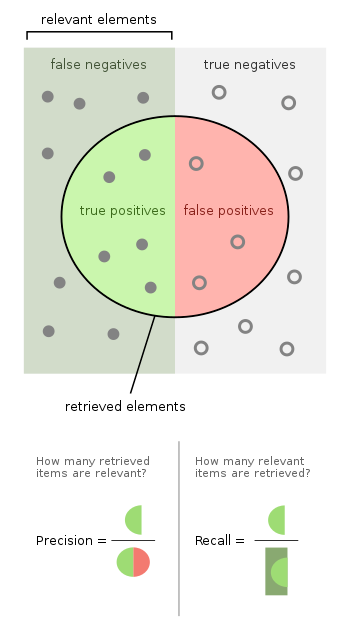

In [ ]:
e = pd.DataFrame()
print('Exact match\n\n')
for c in top:
    tp = 0
    fn = 0
    fp = 0
    for i,j in zip(df['keywords'],df[c]):
        for j1 in j.split(','):
            if j1 in i.split(','):
                tp += 1
            else:
                fp += 1

        for i1 in i.split(','):
            if i1 not in j.split(','):
                fn +=1
    pr = tp / (tp + fn)
    re = tp / (tp + fp)
    print('for {:<20} precision: {:<10.5f} recall: {:.5f}'.format(c,pr,re))
    e[c] = [pr,re]

Exact match


for textRank             precision: 0.06702    recall: 0.06684
for singleRank           precision: 0.02634    recall: 0.02629
for topicRank            precision: 0.10362    recall: 0.10331
for tf-idf               precision: 0.00000    recall: 0.00000
for tf-idf-1             precision: 0.00000    recall: 0.00000
for positionRank         precision: 0.06612    recall: 0.06609
for multipartiteRank     precision: 0.11040    recall: 0.11007
for yake                 precision: 0.09183    recall: 0.02711


In [ ]:
tp,fn,fp

(244, 2413, 8756)

In [ ]:
ne = pd.DataFrame()
print('not Exact match\n\n')
for c in top:
    tp = 0
    fn = 0
    fp = 0
    for i,j in zip(df['keywords'],df[c]):
        for j1 in j.split(','):
            if j1 in i:
                tp += 1
            else:
                fp += 1

        for i1 in i.split(','):
            if i1 not in j:
                fn +=1
    pr = tp / (tp + fn)
    re = tp / (tp + fp)
    print('# {:<20} precision: {:<10.5f} recall: {:.5f}'.format(c,pr,re))
    ne[c] = [pr,re]

not Exact match


# textRank             precision: 0.12026    recall: 0.09876
# singleRank           precision: 0.05825    recall: 0.03380
# topicRank            precision: 0.20508    recall: 0.18820
# tf-idf               precision: 0.00000    recall: 0.00000
# tf-idf-1             precision: 0.00000    recall: 0.00000
# positionRank         precision: 0.23192    recall: 0.27338
# multipartiteRank     precision: 0.20902    recall: 0.19497
# yake                 precision: 0.21679    recall: 0.04333


In [ ]:
tp,fn,fp

(519, 1964, 2143)

In [ ]:
# ne['cleaned_body'] = [0.80586,0.82666]
# e['cleaned_body'] = [0.80586,0.82666]

In [ ]:
e.index = ['precision','recall']
ne.index = ['precision','recall']

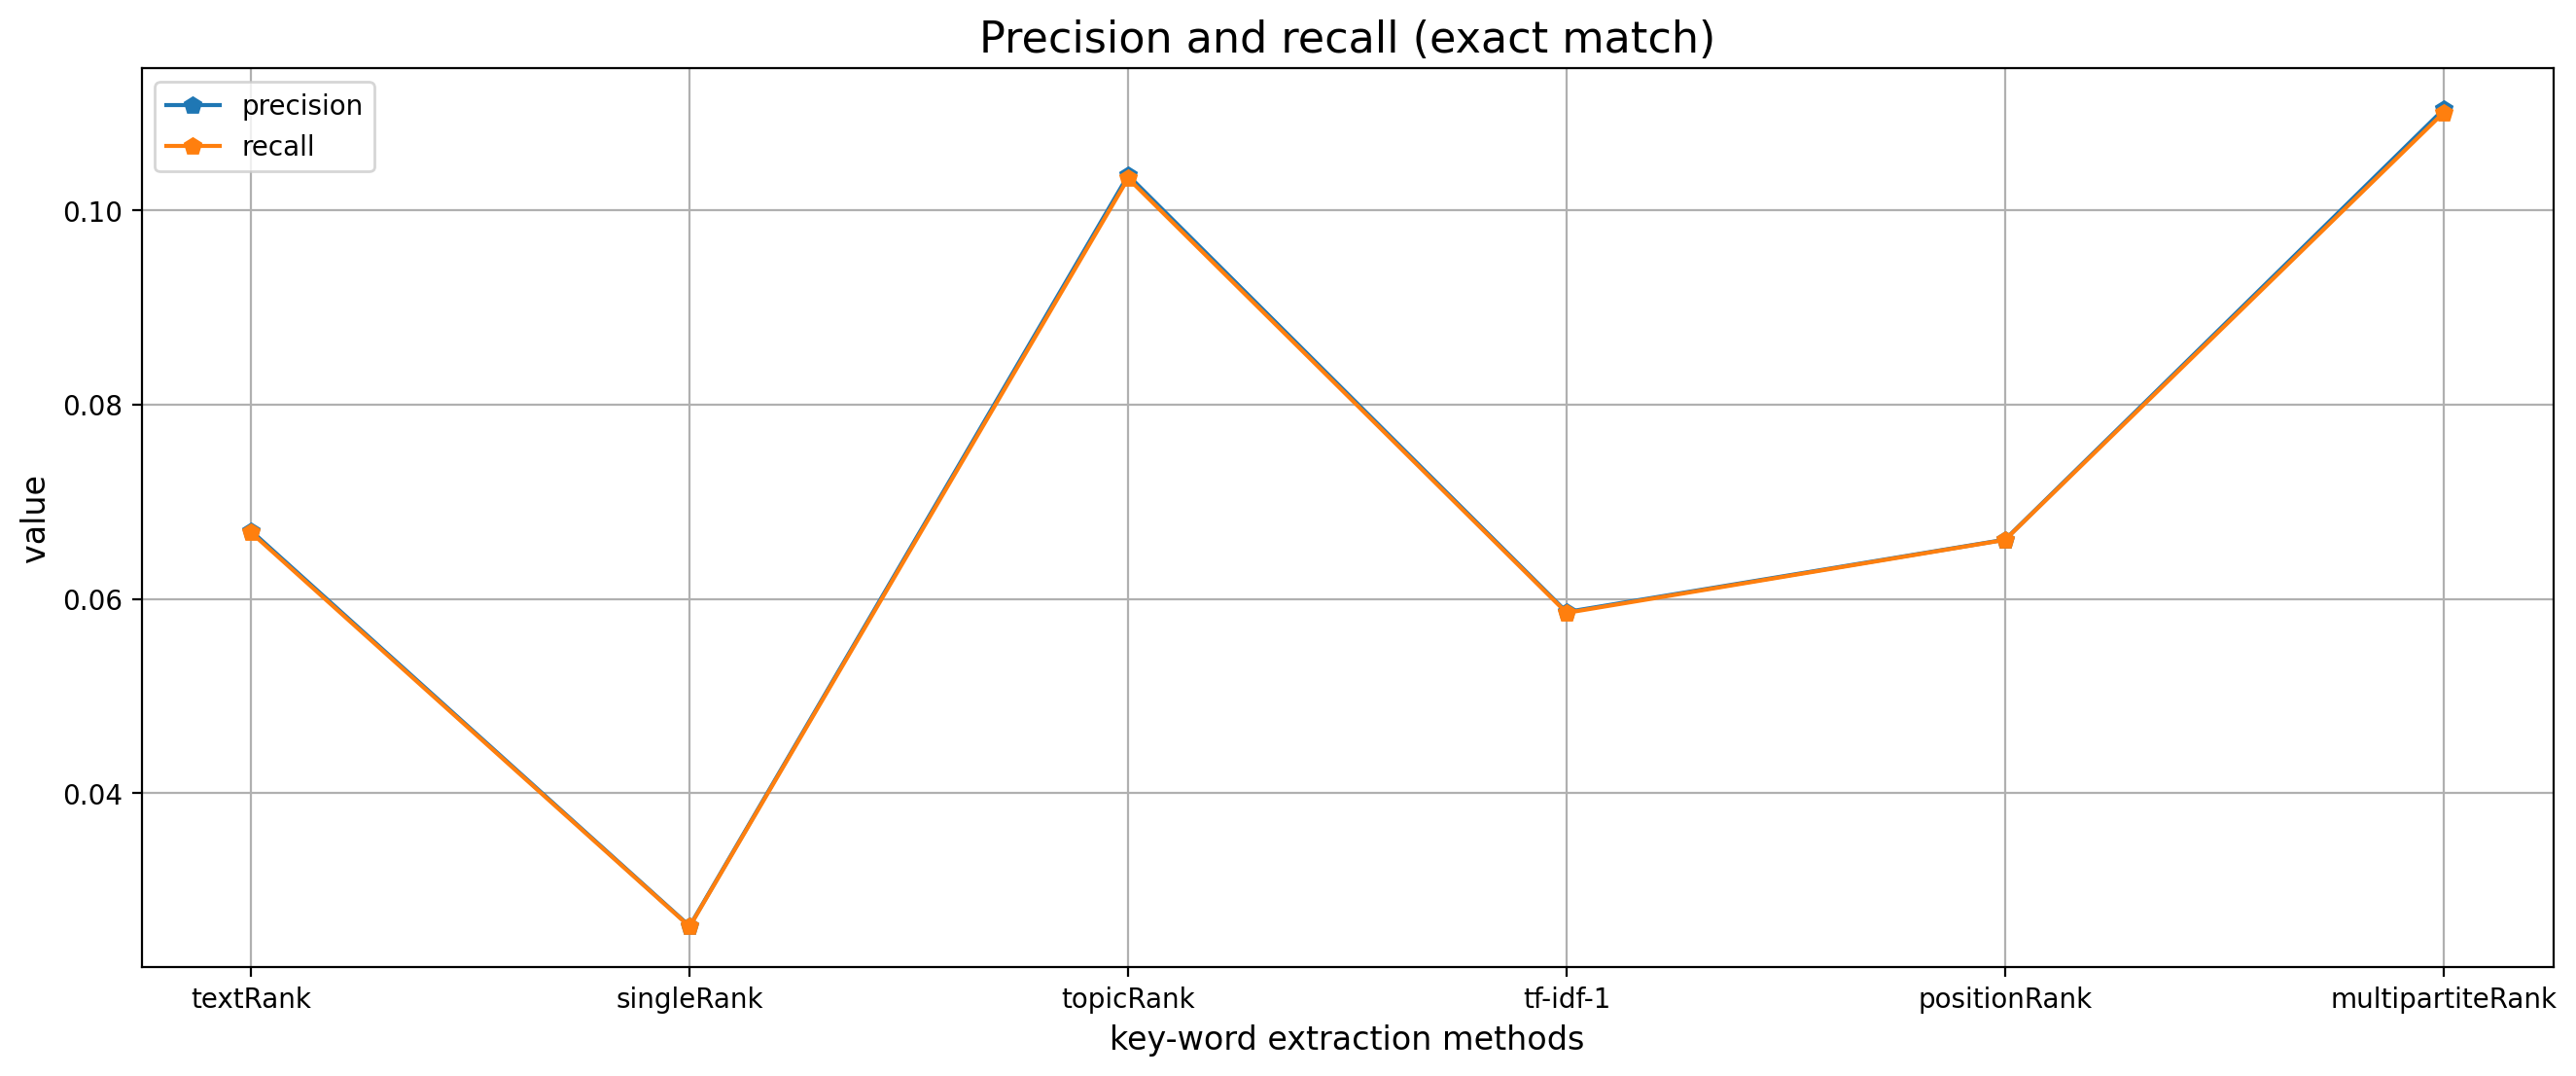

In [ ]:
fig = plt.figure(dpi=200)
e.T.plot(figsize=(16,6),marker='p',grid=True,ax=plt.gca())
# plt.hlines(0.80586,7,0,label='precision')
# plt.hlines(0.82666,7,0,label='recall',color='orange')
plt.title('Precision and recall (exact match)',fontsize=16)
plt.xlabel('key-word extraction methods',fontsize=12)
plt.ylabel('value',fontsize=12)
plt.xticks(fontsize=10)
plt.savefig('./precision_recal_e.png',bbox_inches='tight')

In [ ]:
df.columns

Index(['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank'],
      dtype='object')

In [ ]:
# tp = 0
# fn = 0
# fp = 0
# c = 'cleaned_body'
# for j,i in zip(df['keywords'],df[c]):
# # for j,i in zip(df['keywords'],df[c]):
#     # print('keyword: ',i,'\n',f'{c}: ',j)
#     # print('\n\n')
#     for k in j.split(','):
#         if k in i:
#             tp += 1
#         else:
#             fn += 1
#     for k in i.split(','):
#         if k in j:
#             pass
#         else:
#             fp +=1
# try:
#     pr = tp / (tp + fn)
# except:
#     pr = 1
# try:
#     re = tp / (tp + fp)
# except:
#     re = 1
# print('for {:<20} precision: {:<10.5f} recall: {:.5f}'.format(c,pr,re))
# # e[c] = [pr,re]

for cleaned_body         precision: 0.80586    recall: 0.82666


for keywords             precision: 1.00000    recall: 1.00000
for textRank             precision: 0.27751    recall: 0.23543
for singleRank           precision: 0.45362    recall: 0.31949
for topicRank            precision: 0.27075    recall: 0.25017
for tf-idf               precision: 0.11115    recall: 0.10003
for tf-idf-1             precision: 0.25610    recall: 0.20389
for positionRank         precision: 0.09463    recall: 0.11523
for multipartiteRank     precision: 0.26249    recall: 0.24595


# we have a problem with precision and recall [Closed]

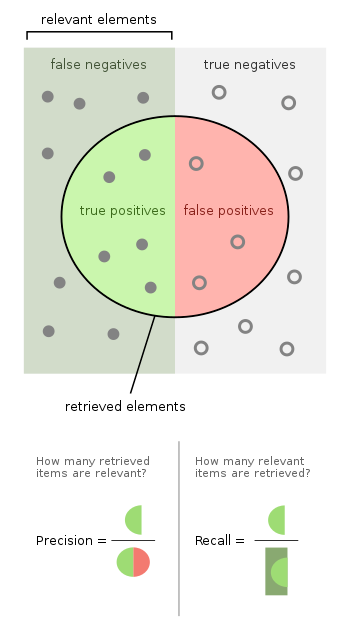

In [ ]:
# in df[c][0] and are in df['keywords'] are tp
# in df[c][0] and are not in df['keywords'] are fp
# in df['keywords'] and are not in df[c][0]are fn
#

'مبانی,شیخ صدوق ره,دنبال روایت قید,پژوهش,مواقعی,نتایج علمی'

In [ ]:
df.columns

Index(['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank',
       'yake', 'NOUN_ADJ', 'NOUN_ADJ_2', 'roshan', 'cleaned_roshan',
       'bigthan0', 'bigthan1', 'bigthan2', 'bigthan3', 'bigthan4', 'bigthan5'],
      dtype='object')

In [ ]:
top = ['textRank','bigthan0', 'bigthan1', 'bigthan2', 'bigthan3', 'bigthan4', 'bigthan5']

In [ ]:
# df[['bigthan5','keywords']][0:1]

In [ ]:
for c in top:
    tp = 0
    fn = 0
    fp = 0
    for i,j in zip(df['keywords'],df[c]):
        for j1 in j.split(','):
            if j1 in i:
                tp += 1
            else:
                fp += 1

        for i1 in i.split(','):
            if i1 not in j.split(','):
                fn +=1
    try:
        pr = tp / (tp + fn)
    except:
        pr = 1
    try:
        re = tp / (tp + fp)
    except:
        re = 1
    print('for {:<20} precision: {:<10.5f} recall: {:<10.5f} and f1 {:.5f}'.format(c,pr,re,(2*pr*re)/(pr+re)))

    # break

for textRank             precision: 0.09595    recall: 0.09876    and f1 0.09734
for bigthan0             precision: 0.84605    recall: 0.01899    and f1 0.03714
for bigthan1             precision: 0.71361    recall: 0.20589    and f1 0.31958
for bigthan2             precision: 0.61476    recall: 0.38478    and f1 0.47331
for bigthan3             precision: 0.52529    recall: 0.53082    and f1 0.52804
for bigthan4             precision: 0.42885    recall: 0.63463    and f1 0.51183
for bigthan5             precision: 0.34060    recall: 0.70161    and f1 0.45858


In [ ]:
fp,tp,fn

(538, 1265, 2449)

In [ ]:
for c in top:
    tp = 0
    fn = 0
    fp = 0
    for j,i in zip(df['keywords'],df[c]):
    # for j,i in zip(df['keywords'],df[c]):
        i2j = []
        j2i = []
        # print('keyword: ',i,'\n',f'{c}: ',j)
        # print('\n\n')
        for k in j.split(','):
            if k in i:
                tp += 1
                # i2j.append(k)
                pass
            else:
                fn += 1
        for k in i.split(','):
            if k in j:
                # tp += 1
                pass
            else:
                fp +=1
    try:
        pr = tp / (tp + fn)
    except:
        pr = 1
    try:
        re = tp / (tp + fp)
    except:
        re = 1
    print('for {:<20} precision: {:<10.5f} recall: {:<10.5f} and f1 {:.5f}'.format(c,pr,re,(2*pr*re)/(pr+re)))

    # break

for textRank             precision: 0.27751    recall: 0.23543    and f1 0.25474
for bigthan0             precision: 0.73413    recall: 0.00587    and f1 0.01165
for bigthan1             precision: 0.43259    recall: 0.06421    and f1 0.11182
for bigthan2             precision: 0.28351    recall: 0.12717    and f1 0.17558
for bigthan3             precision: 0.20653    recall: 0.20454    and f1 0.20553
for bigthan4             precision: 0.13669    recall: 0.26396    and f1 0.18011
for bigthan5             precision: 0.09125    recall: 0.31114    and f1 0.14111


In [ ]:
fp,tp,fn

(538, 243, 2420)

In [ ]:
l2 = 'چجحخهعغفقثصضگکمنتالبیسشوپدذرزطظژء آ ب پ ت ث ج چ ه خ د ذ ر ز ژ س ش ص ض ط ظ ع غ ف ق ک گ ل م ن و  , ه ی \u200c  '
def rnalph2(k):
    kk = ''
    for i,j in enumerate(k):
        if (j in l2)|(j == ','):
            kk = kk + j
        else:pass
    return kk
    df['tf-idf'] = df['tf-idf'].apply(rnalph2)
df['tf-idf'][0]

# i dont know what but
# these are not done yet

 TF-IDF with chunking   
 KP-Miner
 Yake
 scake   
 sgrank
 TopicalPageRank

In [ ]:
df

,body,keywords,cleaned_body,textRank,singleRank,topicRank,tf-idf,tf-idf-1,positionRank,multipartiteRank,yake
0,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,رو...","جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...","شیخ صدوق ره,مبانی,رد روایات اعتقاد,نتایج علمی,...","شیخ, فقه, خویش, روایات, حیطه, بیانی","الحدیثی, فقه الحدیثی, صدوق, شیخ صدوق, شیخ, صدو...","الحدیثی,صدوق,روش شیخ,نوشتار,روایات,روش تبیینی وی","مبانی,شیخ صدوق ره,دنبال روایت قید,پژوهش,مواقعی...","های فقه الحدیثی,فقه الحدیثی خویش,فقه الحدیثی ا..."
1,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...,"سیاست خارجی توسعه سیاسی,رویکرد توسعه‌ای دولت‌ه...",مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...,"سیاست خارجی اولویت توسعه سیاسی,توسعه,نهادهای م...","دولت, به توسعه, توسعه, هفتم, در سیاست","دولت های, نهادهای مدنی, دولت های هفتم هشتم, دو...","پژوهش,توسعه,اولویت توسعه,توسعه سیاسی,سیاست خار...","پژوهش,توسعه,نهادهای مدنی,توجه,احزاب سیاسی حرکت","دولت های هفتم,های رویکردی دولت,رویکردی دولت ها..."
2,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"ترجمه قرآن کریم محمد یزدی بیان,ترجمه قرآن محمد...","ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...","مستلزم ترجمه,آیات قرآن ابراز,آیات قرآن کریم","ترجمه, تفسیری, محمد","ترجمه, در ترجمه, ترجمه ای","تدبر,تدبر آنان,چه","آیات قرآن کریم,تدبر,مترجم قرآن","آیات قرآن کریم,ترجمه قرآن کریم,قرآن کریم محمد"
3,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...,"آزادی بیان و,و بیان آزادی,و امه علیهم السلام,آ...","بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...","دین,آزادی موهبتی,انسان عطا,اسلام,آزادی قلم,قال...","آزادی, قلم, بیان می, قال به, بیان, در عین, امه...","آزادی بیان, آزادی, آزادی نطق, نطق, شود اسلام, ...","بیان آزادی,آزادی,انسان,بیان,موهبتی,اسلام,عطا,دین","آزادی موهبتی,انسان عطا,الهی,خدای متعال,دین,اسل...","بیان آزادی قلم,این آزادی بیان,یعنی آزادی بیان,..."
4,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"اصل آزادی بیان موضع,توحید مجال بیان عقاید,نوع ...","نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...","سیاسی,دین,مرتضی مطهری,نفی آزادی ری,تفسیر,متفکر...","عقاید, آزادی, خاصی از, خاصی, اندیشه, تفسیر","اندیشه سیاسی, متفکری, اندیشه سیاسی آن, مطهری, ...","دین,نکاتی,تفسیر,آن تفسیر,تفسیر محمدتقی مصباح,نشان","دینی,مرتضی مطهری,مبحث آزادی عقیده,متفکری دین,ت...","اندیشه سیاسی آن‌ها,اندیشه سیاسی می‌شود,محمدتقی..."
...,...,...,...,...,...,...,...,...,...,...,...
445,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد...",پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"رضایت شغلی کارکنان کمیته امداد شهرستان شیراز,ع...",عملکرد شغلی کارکنان کمیته امداد امام خمینیره ش...,"تعهد سازمانی,هدف بررسی رابطه رضایت شغلی,کارکنا...","عملکرد شغلی, کمیته امداد, امداد, رضایت شغلی, ش...","شهرستان شیراز, کمیته امداد شهرستان شیراز, امدا...","شیراز,نفر,صورت,استفاده,امام,پرسشنامه,پرسشنامه ...","هدف بررسی رابطه رضایت شغلی,تعهد سازمانی,پژوهش ...","کمیته امداد شهرستان,کارکنان کمیته امداد,امداد ..."
446,سازمان ملل متحد در دهه های اخیر، با تغییر ساخت...,"کمیسیون حقوق‌بشر,حقوق‌بشر در ایران,بررسی دوره‌...",سازمان ملل متحد در دهه های اخیر با تغییر ساختا...,"شورای حقوق بشر دارای تفاوت‌های,تصمیمات شورای ح...","تصمیمات شورای حقوق بشر,نهاد تازه تسیس شورای حق...","تشکیل کمیسیون حقوق بشر,ساختار,عملکرد,کمیسیون,ح...","حقوق بشر, تصمیمات, شورای, بشر, حقوق","شورای حقوق, شورای حقوق بشر, حقوق بشر, شورا, کم...","بشر,ساختار,برجای,تغییرات,سال","فعالیتهای حقوق بشری برجای,ساختار,عملکرد,کمیسیو...","شورای حقوق بشر,تسیس شورای حقوق,سازمان ملل متحد..."
447,تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,"استنباط,کنز العرف

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.0 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23767 sha256=433e95374f03802b242b6fb803749eb3decddffddc0f43a011c63e63bcda9b33
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=e64561d3a63996b617f49f2beae39dddc6720b5f4263db3c00ae6dad04c8a485
 

In [ ]:
# script.py
# from keybert import KeyBERT

# doc = """
#     Supervised learning is the machine learning task of learning a function that
#     maps an input to an output based on example input-output pairs. It infers a
#     function from labeled training data consisting of a set of training examples.
#     In supervised learning, each example is a pair consisting of an input object
#     (typically a vector) and a desired output value (also called the supervisory signal).
#     A supervised learning algorithm analyzes the training data and produces an inferred function,
#     which can be used for mapping new examples. An optimal scenario will allow for the
#     algorithm to correctly determine the class labels for unseen instances. This requires
#     the learning algorithm to generalize from the training data to unseen situations in a
#     'reasonable' way (see inductive bias).
# """
doc = df['body'][0]
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

print(kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None))
#[
#    ('learning', 0.4604),
#    ('algorithm', 0.4556),
#    ('training', 0.4487),
#    ('class', 0.4086),
#    ('mapping', 0.3700)
#]
print(df['keywords'][0])

[('تشکیل', 0.2718), ('رسیدن', 0.268), ('تلاش', 0.2632), ('تفسیر', 0.2488), ('پذیرش', 0.2463)]
فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش هندسی روایات,شیخ صدوق,مبانی فقه الحدیثی


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.5/367.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
!gdown 'https://mega.nz/file/U713TaIb#XRYP5FHbPK2LnLZ8IExrhrw3ZQ-jclNSVCz59uEhrxY'

Downloading...
From: https://mega.nz/file/U713TaIb#XRYP5FHbPK2LnLZ8IExrhrw3ZQ-jclNSVCz59uEhrxY
To: /content/U713TaIb#XRYP5FHbPK2LnLZ8IExrhrw3ZQ-jclNSVCz59uEhrxY
2.21kB [00:00, 6.17MB/s]     


In [ ]:
!pip install mega.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.2.3
    Uninstalling tenacity-8.2.3:
      Successfully uninstalled tenacity-8.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotly 5.15.0 requires tenacity>=6.2.0, but you have tenacity 5.1.5 which is incompatible.


In [ ]:
from mega import Mega

In [ ]:
mega = Mega()

In [ ]:
email = 'workload1997@gmail.com'
password = '9904274Skype#@'
m = mega.login(email, password)
# login using a temporary anonymous account
# m = mega.login()

In [ ]:
details = m.get_user()


In [ ]:
# file = m.find('fasttext_model.zip')
# m.download(file)
# m.download_url('https://mega.co.nz/#!utYjgSTQ!OM4U3V5v_W4N5edSo0wolg1D5H0fwSrLD3oLnLuS9pc')
# m.download(file, '/home/john-smith/Desktop')
# # specify optional download filename (download_url() supports this also)
# m.download(file, '/home/john-smith/Desktop', 'myfile.zip')

In [ ]:
!unzip /content/sent2vec.zip

Archive:  /content/sent2vec.zip
  inflating: sent2vec-naab.model     
  inflating: sent2vec-naab.model.syn1neg.npy  
  inflating: sent2vec-naab.model.wv.vectors.npy  


In [ ]:
!mv /content/sent2vec.zip '/content/drive/MyDrive/Roshan Project/sent2vec.zip'

In [ ]:
# link = 'https://mega.nz/file/1jECmJYI#XRYP5FHbPK2LnLZ8IExrhrw3ZQ-jclNSVCz59uEhrxY'
link = 'https://mega.nz/file/krVgGQaA#J1nG-HGq0UJP69VMY8I1YGl_MfEAFCo5iizpjofA4OY'
m.download_url(link)
# m.download(file)

In [ ]:
from hazm import *

In [ ]:
from hazm import *

# normalizer = Normalizer()
# normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')
# # 'اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند'

# sent_tokenize('ما هم برای وصل کردن آمدیم! ولی برای پردازش، جدا بهتر نیست؟')
# # ['ما هم برای وصل کردن آمدیم!', 'ولی برای پردازش، جدا بهتر نیست؟']
# word_tokenize('ولی برای پردازش، جدا بهتر نیست؟')
# # ['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']

# stemmer = Stemmer()
# stemmer.stem('کتاب‌ها')
# # 'کتاب'
# lemmatizer = Lemmatizer()
# lemmatizer.lemmatize('می‌روم')
# 'رفت#رو'

tagger = POSTagger(model='/content/drive/MyDrive/Roshan Project/pos_tagger.model')
tagger.tag(word_tokenize('ما بسیار کتاب می‌خوانیم'))
# [('ما', 'PRO'), ('بسیار', 'ADV'), ('کتاب', 'N'), ('می‌خوانیم', 'V')]

# chunker = Chunker(model='/content/drive/MyDrive/Roshan Project/chunker.model')
# tagged = tagger.tag(word_tokenize('کتاب خواندن را دوست داریم'))
# tree2brackets(chunker.parse(tagged))
# '[کتاب خواندن NP] [را POSTP] [دوست داریم VP]'

# word_embedding = WordEmbedding(model_type = 'fasttext', model_path = 'word2vec.bin')
# word_embedding.doesnt_match(['سلام' ,'درود' ,'خداحافظ' ,'پنجره'])
# 'پنجره'
# word_embedding.doesnt_match(['ساعت' ,'پلنگ' ,'شیر'])
# 'ساعت'

# parser = DependencyParser(tagger=tagger, lemmatizer=lemmatizer)
# parser.parse(word_tokenize('زنگ‌ها برای که به صدا درمی‌آید؟'))

[('ما', 'PRON'),
 ('بسیار', 'ADV'),
 ('کتاب', 'NOUN'),
 ('می\u200cخوانیم', 'VERB')]

In [ ]:
df

In [ ]:
ss = tagger.tag(word_tokenize(df['cleaned_body'][0]))

In [ ]:
s1 = set()
for i in range(len(ss)):
    s1.add(ss[i][1])

In [ ]:
s1

{'ADJ',
 'ADJ,EZ',
 'ADP',
 'ADP,EZ',
 'CCONJ',
 'DET',
 'NOUN',
 'NOUN,EZ',
 'NUM',
 'PRON',
 'SCONJ',
 'VERB'}

In [ ]:
!pip install hazm
from hazm import *

In [ ]:
tagger = POSTagger(model='/content/drive/MyDrive/Roshan Project/pos_tagger.model')
x = df['cleaned_body'][0]
ss = tagger.tag(word_tokenize(x))
ss2 = []
for i in range(len(ss)):
    if ss[i][1] in ['NOUN','NOUN,EZ','ADJ','ADJ,EZ']:
        ss2.append(ss[i][0])


In [ ]:
ss2

In [ ]:
x.split()

In [ ]:
se = ''
for j in x.split():
    if j in ss2:
        se = se + ' ' + j
se[1:]

'نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اثر شیخ صدوق ره روش مبانی دست پژوهش عمل کنکاش روایات نتیجه ذیل حاصل شیخ صدوق ره حیطه مبانی حیطه روش سبک بیانی تبیینی بیان مطالب فقه الحدیثی مواقعی صدوق ره مبانی روش های فقه الحدیثی نقل روایت بیان توضیح اضافاتی مسکوت می حکایت مبانی روش بیانی پاره ای مواقع بیانات اضافات دنبال روایت قید می مبانی روش تبیینی نظر جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد عصمت علم انبیاء امه اطهار علیهم السلام تقدم نص عقل حفظ جایگاه عقل پذیرش رد روایات اعتقاد لزوم تقیه می تشکیل خانواده حدیثی چینش هندسی روایات تفسیر روایات قرآن روایات عنوان نمونه موارد روش های فقه الحدیثی نویسنده ذکر شواهدی راستا میداتی نتایج علمی اراه مهمترین نتایچ پژوهش مقوله ای بدیع مطابقت مبانی شیخ صدوق روش فقه الحدیثی توجه روش شیخ صدوق چینش هندسی روایات لحاظ محتوا سند هچنین ابواب ابعاد علمی سبک زیبای فقه الحدیثی نمایان می نقش شیخ صدوق تقریب مذاهب دفاع مقام ولایت امامت مذهب حقه شیعه جدال احسن مواردی شیخ صدوق رسیدن مقصود تلاش'

In [ ]:
tagger = POSTagger(model='/content/drive/MyDrive/Roshan Project/pos_tagger.model')

def only_noun_and_adj(x):
    ss = tagger.tag(word_tokenize(x))
    ss2 = []
    for i in range(len(ss)):
        # if ss[i][1] in ['NOUN','NOUN,EZ','ADJ','ADJ,EZ']:
        if ss[i][1] in ['NOUN','ADJ']:

            ss2.append(ss[i][0])
    se = ''
    for j in x.split():
        if j in ss2:
            se += ' ' + j
    return se[1:]


In [ ]:
only_noun_and_adj(df['cleaned_body'][0])

'نوشتار الحدیثی الاخبار شیخ صدوق ره روش مبانی دست پژوهش عمل کنکاش روایات ذیل حاصل شیخ صدوق ره مبانی روش بیانی تبیینی بیان الحدیثی مواقعی صدوق ره مبانی روش های الحدیثی روایت بیان توضیح مسکوت می حکایت مبانی روش بیانی ای مواقع بیانات روایت می مبانی روش تبیینی نظر مبانی الحدیثی شیخ صدوق اعتقاد عصمت انبیاء امه اطهار علیهم السلام تقدم نص عقل عقل پذیرش روایات اعتقاد می حدیثی روایات روایات قرآن روایات نمونه روش های الحدیثی نویسنده شواهدی راستا میداتی علمی اراه مهمترین نتایچ پژوهش ای بدیع مبانی شیخ صدوق روش الحدیثی توجه روش شیخ صدوق روایات محتوا سند هچنین ابواب علمی الحدیثی نمایان می شیخ صدوق مذاهب دفاع ولایت امامت شیعه احسن مواردی شیخ صدوق رسیدن مقصود تلاش'

In [ ]:
df['NOUN_ADJ_2'] = df['cleaned_body'].apply(only_noun_and_adj)

In [ ]:
ssa = 0
ssb = 0
# for i in
for i,j in zip(df['keywords'],df['NOUN_ADJ_2']):
    i2 = i.split(',')
    ssb += len(i2)
    for i1 in i2:
        if i1 in j:
            ssa += 1
ssa/ssb

0.3098009763424709

In [ ]:
for i in range(len(ss)):
    if ss[i][1] in ['NOUN','NOUN,EZ','ADJ','ADJ,EZ']:
        print(ss[i])

('نوشتار', 'NOUN')
('بررسی', 'NOUN,EZ')
('فقه', 'NOUN,EZ')
('الحدیثی', 'NOUN')
('کتاب', 'NOUN,EZ')
('معانی', 'NOUN,EZ')
('الاخبار', 'NOUN')
('اثر', 'NOUN,EZ')
('شیخ', 'NOUN,EZ')
('صدوق', 'NOUN')
('ره', 'NOUN')
('روش', 'NOUN')
('مبانی', 'NOUN,EZ')
('دست', 'NOUN')
('پژوهش', 'NOUN')
('عمل', 'NOUN')
('کنکاش', 'NOUN')
('روایات', 'NOUN')
('نتیجه', 'NOUN,EZ')
('ذیل', 'ADJ')
('حاصل', 'NOUN')
('شیخ', 'NOUN,EZ')
('صدوق', 'NOUN')
('ره', 'NOUN')
('حیطه', 'NOUN,EZ')
('مبانی', 'NOUN')
('حیطه', 'NOUN,EZ')
('روش', 'NOUN')
('سبک', 'NOUN,EZ')
('بیانی', 'ADJ')
('تبیینی', 'NOUN')
('بیان', 'NOUN,EZ')
('مطالب', 'NOUN,EZ')
('فقه', 'NOUN,EZ')
('الحدیثی', 'ADJ,EZ')
('مواقعی', 'NOUN')
('صدوق', 'NOUN')
('ره', 'NOUN,EZ')
('مبانی', 'NOUN')
('روش', 'NOUN,EZ')
('های', 'NOUN')
('فقه', 'NOUN,EZ')
('الحدیثی', 'ADJ,EZ')
('نقل', 'NOUN,EZ')
('روایت', 'NOUN')
('بیان', 'NOUN')
('توضیح', 'NOUN')
('اضافاتی', 'ADJ,EZ')
('مسکوت', 'ADJ')
('می', 'NOUN')
('حکایت', 'NOUN')
('مبانی', 'NOUN')
('روش', 'NOUN,EZ')
('بیانی', 'ADJ')
('پار

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_16.csv')
d

,body,keywords,cleaned_body,textRank,singleRank,topicRank,tf-idf,tf-idf-1,positionRank,multipartiteRank,yake,NOUN_ADJ,NOUN_ADJ_2
0,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,رو...","جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...","شیخ صدوق ره,مبانی,رد روایات اعتقاد,نتایج علمی,...","شیخ, فقه, خویش, روایات, حیطه, بیانی","الحدیثی, فقه الحدیثی, صدوق, شیخ صدوق, شیخ, صدو...","الحدیثی,صدوق,روش شیخ,نوشتار,روایات,روش تبیینی وی","مبانی,شیخ صدوق ره,دنبال روایت قید,پژوهش,مواقعی...","های فقه الحدیثی,فقه الحدیثی خویش,فقه الحدیثی ا...",نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,نوشتار الحدیثی الاخبار شیخ صدوق ره روش مبانی د...
1,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...,"سیاست خارجی توسعه سیاسی,رویکرد توسعه‌ای دولت‌ه...",مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...,"سیاست خارجی اولویت توسعه سیاسی,توسعه,نهادهای م...","دولت, به توسعه, توسعه, هفتم, در سیاست","دولت های, نهادهای مدنی, دولت های هفتم هشتم, دو...","پژوهش,توسعه,اولویت توسعه,توسعه سیاسی,سیاست خار...","پژوهش,توسعه,نهادهای مدنی,توجه,احزاب سیاسی حرکت","دولت های هفتم,های رویکردی دولت,رویکردی دولت ها...",چکیده پژوهش چارچوب نظری دولت توسعه گرای آدریان...,پژوهش دولت توسعه آدریان ویچ پیتر ایوانز توسعه ...
2,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"ترجمه قرآن کریم محمد یزدی بیان,ترجمه قرآن محمد...","ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...","مستلزم ترجمه,آیات قرآن ابراز,آیات قرآن کریم","ترجمه, تفسیری, محمد","ترجمه, در ترجمه, ترجمه ای","تدبر,تدبر آنان,چه","آیات قرآن کریم,تدبر,مترجم قرآن","آیات قرآن کریم,ترجمه قرآن کریم,قرآن کریم محمد",فهم معانی عمیق تدبر آیات قرآن کریم بهره‌مندی چ...,فهم عمیق تدبر آیات قرآن کریم چه بیشتر های رو ا...
3,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...,"آزادی بیان و,و بیان آزادی,و امه علیهم السلام,آ...","بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...","دین,آزادی موهبتی,انسان عطا,اسلام,آزادی قلم,قال...","آزادی, قلم, بیان می, قال به, بیان, در عین, امه...","آزادی بیان, آزادی, آزادی نطق, نطق, شود اسلام, ...","بیان آزادی,آزادی,انسان,بیان,موهبتی,اسلام,عطا,دین","آزادی موهبتی,انسان عطا,الهی,خدای متعال,دین,اسل...","بیان آزادی قلم,این آزادی بیان,یعنی آزادی بیان,...",آزادی موهبتی الهی خدای متعال انسان عطا انسان م...,آزادی موهبتی الهی متعال انسان عطا انسان ضعیف ع...
4,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"اصل آزادی بیان موضع,توحید مجال بیان عقاید,نوع ...","نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...","سیاسی,دین,مرتضی مطهری,نفی آزادی ری,تفسیر,متفکر...","عقاید, آزادی, خاصی از, خاصی, اندیشه, تفسیر","اندیشه سیاسی, متفکری, اندیشه سیاسی آن, مطهری, ...","دین,نکاتی,تفسیر,آن تفسیر,تفسیر محمدتقی مصباح,نشان","دینی,مرتضی مطهری,مبحث آزادی عقیده,متفکری دین,ت...","اندیشه سیاسی آن‌ها,اندیشه سیاسی می‌شود,محمدتقی...",نکاتی توجه پژوهشگران اندیشه‌های سیاسی اجتماعی ...,نکاتی سیاسی اجتماعی دینی جلب نو تازه دین سنتی ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد...",پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"رضایت شغلی کارکنان کمیته امداد شهرستان شیراز,ع...",عملکرد شغلی کارکنان کمیته امداد امام خمینیره ش...,"تعهد سازمانی,هدف بررسی رابطه رضایت شغلی,کارکنا...","عملکرد شغلی, کمیته امداد, امداد, رضایت شغلی, ش...","شهرستان شیراز, کمیته امداد شهرستان شیراز, امدا...","شیراز,نفر,صورت,استفاده,امام,پرسشنامه,پرسشنامه ...","هدف بررسی رابطه رضایت شغلی,تعهد سازمانی,پژوهش ...","کمیته امداد شهرستان,کارکنان کمیته امداد,امداد ...",پژوهش حاضر هدف بررسی رابطه رضایت شغلی تعهد ساز...,پژوهش حاضر رابطه شغلی سازمانی ش

In [ ]:
df.to_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_16.csv',index=False)

# استخراج کلمات از سایت هضم

In [ ]:
import numpy as np
import nltk
import re
import string
import warnings
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from configparser import ConfigParser
from functools import reduce
from gensim.models import Doc2Vec
from hazm import SentEmbedding
from hazm import *

In [ ]:
# import hazm
# dir(hazm)

In [ ]:
# text = 'سفارت ایران در مادرید درباره فیلم منتشرشده از «حسن قشقاوی» در مراسم سال نو در کاخ سلطنتی اسپانیا و حاشیه‌سازی‌ها در فضای مجازی اعلام کرد: به تشریفات دربار کتباً اعلام شد سفیر بدون همراه در مراسم حضور خواهد داشت و همچون قبل به دلایل تشریفاتی نمی‌تواند با ملکه دست بدهد. همان‌گونه که کارشناس رسمی تشریفات در توضیحات خود به یک نشریه اسپانیایی گفت این موضوع توضیح مذهبی داشته و هرگز به معنی بی‌احترامی به مقام و شخصیت زن آن هم در سطح ملکه محترمه یک کشور نیست.'
text = df['body'][0]
keyword_count = 10


In [ ]:
normalizer = Normalizer()
model_path = '/content/drive/MyDrive/Roshan Project/pos_tagger.model'
tagger = POSTagger(model = model_path)
grammers = [
"""
NP:
        {<NOUN,EZ>?<NOUN.*>}    # Noun(s) + Noun(optional)

""",

"""
NP:
        {<NOUN.*><ADJ.*>?}    # Noun(s) + Adjective(optional)

"""
]
def extract_candidates(tagged, grammer):
    keyphrase_candidate = set()
    np_parser = nltk.RegexpParser(grammer)
    trees = np_parser.parse_sents(tagged)
    for tree in trees:
        for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):  # For each nounphrase
            # Concatenate the token with a space
            keyphrase_candidate.add(' '.join(word for word, tag in subtree.leaves()))
    keyphrase_candidate = {kp for kp in keyphrase_candidate if len(kp.split()) <= 5}
    keyphrase_candidate = list(keyphrase_candidate)
    return keyphrase_candidate
sent2vec_model_path = '/content/sent2vec-naab.model'
sent2vec_model = SentEmbedding(sent2vec_model_path)

In [ ]:
def roshan(text):
    normalize_text = normalizer.normalize(text)
    tokenize_text = [word_tokenize(txt) for txt in sent_tokenize(normalize_text)]
    token_tag_list = tagger.tag_sents(tokenize_text)
    all_candidates = set()
    for grammer in grammers:
        all_candidates.update(extract_candidates(token_tag_list, grammer))
    all_candidates = np.array(list(all_candidates))
    all_candidates_vectors = [sent2vec_model[candidate] for candidate in all_candidates]

    candidates_concatinate = ' '.join(all_candidates)
    whole_text_vector = sent2vec_model[candidates_concatinate]

    candidates_sim_whole = cosine_similarity(all_candidates_vectors, whole_text_vector.reshape(1,-1))

    candidates_sim_whole_norm = candidates_sim_whole / np.max(candidates_sim_whole)
    candidates_sim_whole_norm = 0.5 + (candidates_sim_whole_norm - np.average(candidates_sim_whole_norm)) / np.std(candidates_sim_whole_norm)

    candidate_sim_candidate = cosine_similarity(all_candidates_vectors)

    np.fill_diagonal(candidate_sim_candidate, np.NaN)
    candidate_sim_candidate_norm = candidate_sim_candidate / np.nanmax(candidate_sim_candidate, axis=0)
    candidate_sim_candidate_norm = 0.5 + (candidate_sim_candidate_norm - np.nanmean(candidate_sim_candidate_norm, axis=0)) / np.nanstd(candidate_sim_candidate_norm, axis=0)

    beta = 0.82
    N = min(len(all_candidates), keyword_count)

    selected_candidates = []
    unselected_candidates = [i for i in range(len(all_candidates))]
    best_candidate = np.argmax(candidates_sim_whole_norm)
    selected_candidates.append(best_candidate)
    unselected_candidates.remove(best_candidate)


    for i in range(N-1):
        selected_vec = np.array(selected_candidates)
        unselected_vec = np.array(unselected_candidates)

        unselected_candidate_sim_whole_norm = candidates_sim_whole_norm[unselected_vec, :]

        dist_between = candidate_sim_candidate_norm[unselected_vec][:, selected_vec]

        if dist_between.ndim == 1:
            dist_between = dist_between[:, np.newaxis]

        best_candidate = np.argmax(beta * unselected_candidate_sim_whole_norm - (1 - beta) * np.max(dist_between, axis = 1).reshape(-1,1))
        best_index = unselected_candidates[best_candidate]
        selected_candidates.append(best_index)
        unselected_candidates.remove(best_index)
    # all_candidates[selected_candidates].tolist()
    l = all_candidates[selected_candidates].tolist()
    ll = ' '
    for i in l:
        ll = ll + "," + i
    return ll[1:]


In [ ]:
df.columns

Index(['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank',
       'yake', 'NOUN_ADJ', 'NOUN_ADJ_2', 'roshan'],
      dtype='object')

In [ ]:
df['cleaned_roshan'] = df['cleaned_body'].apply(roshan)

In [ ]:
# normalizer = Normalizer()
# normalize_text = normalizer.normalize(text)
# tokenize_text = [word_tokenize(txt) for txt in sent_tokenize(normalize_text)]
# # tokenize_text


In [ ]:
# model_path = '/content/drive/MyDrive/Roshan Project/pos_tagger.model'
# tagger = POSTagger(model = model_path)
# token_tag_list = tagger.tag_sents(tokenize_text)
# # token_tag_list


In [ ]:
# grammers = [
# """
# NP:
#         {<NOUN,EZ>?<NOUN.*>}    # Noun(s) + Noun(optional)

# """,

# """
# NP:
#         {<NOUN.*><ADJ.*>?}    # Noun(s) + Adjective(optional)

# """
# ]
# ## you can also add your own grammer to be extracted from the text...


In [ ]:
# def extract_candidates(tagged, grammer):
#     keyphrase_candidate = set()
#     np_parser = nltk.RegexpParser(grammer)
#     trees = np_parser.parse_sents(tagged)
#     for tree in trees:
#         for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):  # For each nounphrase
#             # Concatenate the token with a space
#             keyphrase_candidate.add(' '.join(word for word, tag in subtree.leaves()))
#     keyphrase_candidate = {kp for kp in keyphrase_candidate if len(kp.split()) <= 5}
#     keyphrase_candidate = list(keyphrase_candidate)
#     return keyphrase_candidate

# all_candidates = set()
# for grammer in grammers:
#     all_candidates.update(extract_candidates(token_tag_list, grammer))


# all_candidates = np.array(list(all_candidates))


# # print(np.array(list(all_candidates)))


In [ ]:
# sent2vec_model_path = '/content/sent2vec-naab.model'
# sent2vec_model = SentEmbedding(sent2vec_model_path)


In [ ]:
# all_candidates_vectors = [sent2vec_model[candidate] for candidate in all_candidates]
# # all_candidates_vectors[0:2]


In [ ]:
# candidates_concatinate = ' '.join(all_candidates)
# whole_text_vector = sent2vec_model[candidates_concatinate]
# # whole_text_vector


In [ ]:
# candidates_sim_whole = cosine_similarity(all_candidates_vectors, whole_text_vector.reshape(1,-1))
# # candidates_sim_whole.reshape(1,-1)


In [ ]:
# candidates_sim_whole_norm = candidates_sim_whole / np.max(candidates_sim_whole)
# candidates_sim_whole_norm = 0.5 + (candidates_sim_whole_norm - np.average(candidates_sim_whole_norm)) / np.std(candidates_sim_whole_norm)
# # candidates_sim_whole_norm
# #

In [ ]:
# candidate_sim_candidate = cosine_similarity(all_candidates_vectors)
# # candidate_sim_candidate


In [ ]:
# np.fill_diagonal(candidate_sim_candidate, np.NaN)
# candidate_sim_candidate_norm = candidate_sim_candidate / np.nanmax(candidate_sim_candidate, axis=0)
# candidate_sim_candidate_norm = 0.5 + (candidate_sim_candidate_norm - np.nanmean(candidate_sim_candidate_norm, axis=0)) / np.nanstd(candidate_sim_candidate_norm, axis=0)
# # candidate_sim_candidate_norm


In [ ]:
# beta = 0.82
# N = min(len(all_candidates), keyword_count)

# selected_candidates = []
# unselected_candidates = [i for i in range(len(all_candidates))]
# best_candidate = np.argmax(candidates_sim_whole_norm)
# selected_candidates.append(best_candidate)
# unselected_candidates.remove(best_candidate)


# for i in range(N-1):
#     selected_vec = np.array(selected_candidates)
#     unselected_vec = np.array(unselected_candidates)

#     unselected_candidate_sim_whole_norm = candidates_sim_whole_norm[unselected_vec, :]

#     dist_between = candidate_sim_candidate_norm[unselected_vec][:, selected_vec]

#     if dist_between.ndim == 1:
#         dist_between = dist_between[:, np.newaxis]

#     best_candidate = np.argmax(beta * unselected_candidate_sim_whole_norm - (1 - beta) * np.max(dist_between, axis = 1).reshape(-1,1))
#     best_index = unselected_candidates[best_candidate]
#     selected_candidates.append(best_index)
#     unselected_candidates.remove(best_index)
# all_candidates[selected_candidates].tolist()


['روش فقه',
 'رد روایات',
 'روش\u200cهای فقه',
 'بررسی فقه',
 'مبانی',
 'نتیجه ذیل',
 'فقه',
 'روش بیانی',
 'موارد روش\u200cهای',
 'حیطه روش']

In [ ]:
# df['keywords'][0]

'فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش هندسی روایات,شیخ صدوق,مبانی فقه الحدیثی'

# start embedding stuff

In [ ]:
l_ = ",".join(i for i in df['keywords'])

In [ ]:
h2 = len(l_.split(','))

In [ ]:
h = 0
for i in l_.split(','):
    if len(i.split())>5:
        # h = len(i)
        h += 1
        print(h,":",i)
# print(h)
h/h2

In [ ]:
df1 = df[['NOUN_ADJ','keywords']][0:10].copy()

In [ ]:
# df2 = df1['NOUN_ADJ'].str.split()

In [ ]:
from collections import Counter

In [ ]:
print(Counter(df1['NOUN_ADJ'][0].split()))

Counter({'صدوق': 8, 'روش': 8, 'فقه': 7, 'الحدیثی': 7, 'شیخ': 7, 'مبانی': 7, 'روایات': 6, 'می': 4, 'ره': 3, 'پژوهش': 2, 'حیطه': 2, 'سبک': 2, 'بیانی': 2, 'تبیینی': 2, 'بیان': 2, 'های': 2, 'روایت': 2, 'ای': 2, 'اعتقاد': 2, 'عقل': 2, 'چینش': 2, 'هندسی': 2, 'علمی': 2, 'نوشتار': 1, 'بررسی': 1, 'کتاب': 1, 'معانی': 1, 'الاخبار': 1, 'اثر': 1, 'دست': 1, 'عمل': 1, 'کنکاش': 1, 'نتیجه': 1, 'ذیل': 1, 'حاصل': 1, 'مطالب': 1, 'مواقعی': 1, 'نقل': 1, 'توضیح': 1, 'اضافاتی': 1, 'مسکوت': 1, 'حکایت': 1, 'پاره': 1, 'مواقع': 1, 'بیانات': 1, 'اضافات': 1, 'دنبال': 1, 'قید': 1, 'نظر': 1, 'جمله': 1, 'عصمت': 1, 'علم': 1, 'انبیاء': 1, 'امه': 1, 'اطهار': 1, 'علیهم': 1, 'السلام': 1, 'تقدم': 1, 'نص': 1, 'حفظ': 1, 'جایگاه': 1, 'پذیرش': 1, 'رد': 1, 'لزوم': 1, 'تقیه': 1, 'تشکیل': 1, 'خانواده': 1, 'حدیثی': 1, 'تفسیر': 1, 'قرآن': 1, 'عنوان': 1, 'نمونه': 1, 'موارد': 1, 'نویسنده': 1, 'ذکر': 1, 'شواهدی': 1, 'راستا': 1, 'میداتی': 1, 'نتایج': 1, 'اراه': 1, 'مهمترین': 1, 'نتایچ': 1, 'مقوله': 1, 'بدیع': 1, 'مطابقت': 1, 'توجه': 1, 

In [ ]:
df1['keywords'][0].split(',')

['فقه الحدیث',
 'معانی الاخبار',
 'روش فقه الحدیثی',
 'چینش هندسی روایات',
 'شیخ صدوق',
 'مبانی فقه الحدیثی']

In [ ]:
f = dict()
f1 = df1['NOUN_ADJ'][0].split()
for i,j,k,l,m in zip(f1,f1[1:],f1[2:],f1[3:],f1[4:]):
    if f.get(i):
        f[i] += 1
    else:
        f[i] = 1

    ij = f'{i} {j}'
    if f.get(ij):
        f[ij] += 1
    else:
        f[ij] = 1

    ijk = f'{i} {j} {k}'
    if f.get(ijk):
        f[ijk] += 1
    else:
        f[ijk] = 1

    ijkl = f'{i} {j} {k} {l}'
    if f.get(ijkl):
        f[ijkl] += 1
    else:
        f[ijkl] = 1

    ijklm = f'{i} {j} {k} {l} {m}'
    if f.get(ijklm):
        f[ijklm] += 1
    else:
        f[ijklm] = 1


In [ ]:
f

In [ ]:
f2 = {}
for i in f.keys():
    if f[i] > 1:
        f2[i] = f[i]

In [ ]:
f2

In [ ]:
for i in df1['keywords'][0].split(','):
    try:
        print(i,f[i])
    except:
        print(i)

فقه الحدیث
معانی الاخبار 1
روش فقه الحدیثی 1
چینش هندسی روایات 2
شیخ صدوق 7
مبانی فقه الحدیثی 1


In [ ]:
# 09199367030

# how many time the keywords are repeated
g1 = []
g2 = []
g_1 = 0
g_2 = 0
k_0 = []
for ids,idf in zip(df['NOUN_ADJ'],df['keywords']):
    f = dict()
    f1 = ids.split()
    for i,j,k,l,m in zip(f1,f1[1:],f1[2:],f1[3:],f1[4:]):
        if f.get(i):
            f[i] += 1
        else:
            f[i] = 1

        ij = f'{i} {j}'
        if f.get(ij):
            f[ij] += 1
        else:
            f[ij] = 1

        ijk = f'{i} {j} {k}'
        if f.get(ijk):
            f[ijk] += 1
        else:
            f[ijk] = 1

        ijkl = f'{i} {j} {k} {l}'
        if f.get(ijkl):
            f[ijkl] += 1
        else:
            f[ijkl] = 1

        ijklm = f'{i} {j} {k} {l} {m}'
        if f.get(ijklm):
            f[ijklm] += 1
        else:
            f[ijklm] = 1
    llkm = ""
    for i in idf.split(','):
        try:
            # print(i,f[i])
            if f[i] > 5:
                g_1 += 1
                g1.append(f[i])
                llkm = llkm + ',' + i
                llkm = llkm[1:]
            else:
                g2.append(1)
        except:
                g2.append(1)
    k_0.append(llkm)

In [ ]:
# 09199367030

# how many time the keywords are repeated
g1 = []
g2 = []
g_1 = 0
g_2 = 0
k_0 = []
for ids,idf in zip(df['NOUN_ADJ'],df['keywords']):
    f = dict()
    f1 = ids.split()
    for i,j,k,l,m in zip(f1,f1[1:],f1[2:],f1[3:],f1[4:]):
        if f.get(i):
            f[i] += 1
        else:
            f[i] = 1

        ij = f'{i} {j}'
        if f.get(ij):
            f[ij] += 1
        else:
            f[ij] = 1

        ijk = f'{i} {j} {k}'
        if f.get(ijk):
            f[ijk] += 1
        else:
            f[ijk] = 1

        ijkl = f'{i} {j} {k} {l}'
        if f.get(ijkl):
            f[ijkl] += 1
        else:
            f[ijkl] = 1

        ijklm = f'{i} {j} {k} {l} {m}'
        if f.get(ijklm):
            f[ijklm] += 1
        else:
            f[ijklm] = 1
    llkm = ""
    for i in f.keys():
        # try:
            # print(i,f[i])
        if f[i] > 6:
            g_1 += 1
            g1.append(f[i])
            llkm = llkm + ',' + i
            llkm = llkm[1:]
    k_0.append(llkm)

In [ ]:
df['bigthan6'] = k_0

In [ ]:
df

,body,keywords,cleaned_body,textRank,singleRank,topicRank,tf-idf,tf-idf-1,positionRank,multipartiteRank,...,NOUN_ADJ,NOUN_ADJ_2,roshan,cleaned_roshan,bigthan0,bigthan1,bigthan2,bigthan3,bigthan4,bigthan5
0,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,رو...","جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...","شیخ صدوق ره,مبانی,رد روایات اعتقاد,نتایج علمی,...","شیخ, فقه, خویش, روایات, حیطه, بیانی","الحدیثی, فقه الحدیثی, صدوق, شیخ صدوق, شیخ, صدو...","الحدیثی,صدوق,روش شیخ,نوشتار,روایات,روش تبیینی وی","مبانی,شیخ صدوق ره,دنبال روایت قید,پژوهش,مواقعی...",...,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,نوشتار الحدیثی الاخبار شیخ صدوق ره روش مبانی د...,",روش فقه,مطابقت مبانی,موارد روش‌های,رد روایات,...",",روش‌های فقه,رد روایات,روش فقه,مطابقت مبانی,مو...","ی الاخبار,روش فقه الحدیثی,چینش هندسی روایات,شی...","ینش هندسی روایات,شیخ صدوق",شیخ صدوق,شیخ صدوق,شیخ صدوق,شیخ صدوق
1,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...,"سیاست خارجی توسعه سیاسی,رویکرد توسعه‌ای دولت‌ه...",مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...,"سیاست خارجی اولویت توسعه سیاسی,توسعه,نهادهای م...","دولت, به توسعه, توسعه, هفتم, در سیاست","دولت های, نهادهای مدنی, دولت های هفتم هشتم, دو...","پژوهش,توسعه,اولویت توسعه,توسعه سیاسی,سیاست خار...","پژوهش,توسعه,نهادهای مدنی,توجه,احزاب سیاسی حرکت",...,چکیده پژوهش چارچوب نظری دولت توسعه گرای آدریان...,پژوهش دولت توسعه آدریان ویچ پیتر ایوانز توسعه ...,",نتیجه توسعه,تفاوت رویکردی,روش تحلیل,رویکرد,او...",",نتیجه توسعه,تفاوت رویکردی,پیوند توسعه,رویکرده...","محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,محمود ا...",,,,,
2,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"ترجمه قرآن کریم محمد یزدی بیان,ترجمه قرآن محمد...","ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...","مستلزم ترجمه,آیات قرآن ابراز,آیات قرآن کریم","ترجمه, تفسیری, محمد","ترجمه, در ترجمه, ترجمه ای","تدبر,تدبر آنان,چه","آیات قرآن کریم,تدبر,مترجم قرآن",...,فهم معانی عمیق تدبر آیات قرآن کریم بهره‌مندی چ...,فهم عمیق تدبر آیات قرآن کریم چه بیشتر های رو ا...,",تفسیر نقش,ترجمه به‌گونه‌ای,مفاهیم بلند,ترجمه‌...",",تفسیر خاص,ترجمه به‌گونه‌ای,تفسیر نقش,زمینه فه...","حمد یزدی,ترجمه قرآن","حمد یزدی,ترجمه قرآن","حمد یزدی,ترجمه قرآن",ترجمه قرآن,,
3,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...,"آزادی بیان و,و بیان آزادی,و امه علیهم السلام,آ...","بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...","دین,آزادی موهبتی,انسان عطا,اسلام,آزادی قلم,قال...","آزادی, قلم, بیان می, قال به, بیان, در عین, امه...","آزادی بیان, آزادی, آزادی نطق, نطق, شود اسلام, ...","بیان آزادی,آزادی,انسان,بیان,موهبتی,اسلام,عطا,دین","آزادی موهبتی,انسان عطا,الهی,خدای متعال,دین,اسل...",...,آزادی موهبتی الهی خدای متعال انسان عطا انسان م...,آزادی موهبتی الهی متعال انسان عطا انسان ضعیف ع...,",مسلمانان قائل,حریم دین,آزادی قلم,کتمان حق,مقد...",",مردم واجب,آزادی قلم,حریم دین,کتمان حق,کمال,ام...","ادی بیان,دین,ارتداد","زادی بیان,دین","زادی بیان,دین",آزادی بیان,,
4,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"اصل آزادی بیان موضع,توحید مجال بیان عقاید,نوع ...","نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...","سیاسی,دین,مرتضی مطهری,نفی آزادی ری,تفسیر,متفکر...","عقاید, آزادی, خاصی از, خاصی, اندیشه, تفسیر","اندیشه سیاسی, متفکری, اندیشه سیاسی آن, مطهری, ...","دین,نکاتی,تفسیر,آن تفسیر,تفسیر محمدتقی مصباح,نشان","دینی,مرتضی مطهری,مبحث آزادی عقیده,متفکری دین,ت...",...,نکاتی توجه پژوهشگران اندیشه‌های سیاسی اجتماعی ...,نکاتی سیاسی اجتماعی دینی جلب نو تازه دین سنتی ...,",نوع تفاسیر,تفسیر دین,مخالفان توحید,ظهور برداش...",",تفسیر دین,مخالفان توحید,اتخاذ عقاید,نفی,نوع ت...","دی,مرتضی مطهری,تفسیر دین,اندی

In [ ]:
# 09199367030

# how many time the keywords are repeated
g1 = []
g2 = []
g1_ = 0
g2_ = 0
g3_ = 0
g4_ = 0
g5_ = 0
g___ = 0
g_1 = 0
g_2 = 0
for ids,idf in zip(df['NOUN_ADJ'],df['keywords']):
    f = dict()
    f1 = ids.split()
    for i,j,k,l,m in zip(f1,f1[1:],f1[2:],f1[3:],f1[4:]):
        if f.get(i):
            f[i] += 1
        else:
            f[i] = 1

        ij = f'{i} {j}'
        if f.get(ij):
            f[ij] += 1
        else:
            f[ij] = 1

        ijk = f'{i} {j} {k}'
        if f.get(ijk):
            f[ijk] += 1
        else:
            f[ijk] = 1

        ijkl = f'{i} {j} {k} {l}'
        if f.get(ijkl):
            f[ijkl] += 1
        else:
            f[ijkl] = 1

        ijklm = f'{i} {j} {k} {l} {m}'
        if f.get(ijklm):
            f[ijklm] += 1
        else:
            f[ijklm] = 1
    for i in idf.split(','):
        try:
            # print(i,f[i])
            if f[i] > 0:
                # g_1 += 1
                g1_ += 1
            if f[i] > 1:
                # g_1 += 1
                g2_ += 1
            if f[i] > 2:
                # g_1 += 1
                g3_ += 1
            if f[i] > 3:
                # g_1 += 1
                g4_ += 1
            if f[i] > 4:
                # g_1 += 1
                g5_ += 1
            if f[i] > 5:
                # g_1 += 1
                g___ += 1

            else:
                g2.append(1)
        except:
                g2.append(1)

In [ ]:
repeated_keys = np.array([g1_,g2_,g3_,g4_,g5_,g___])

<Axes: ylabel='Frequency'>

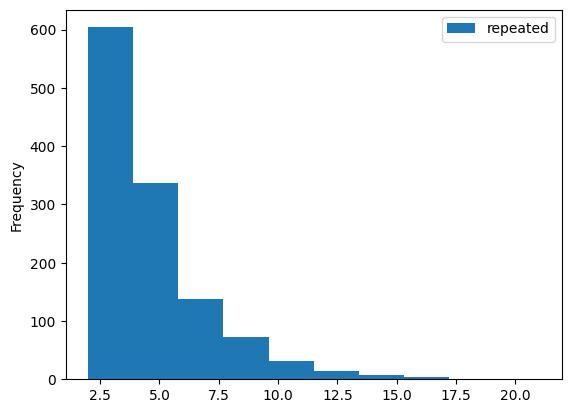

In [ ]:
pd.DataFrame(g1,columns=['repeated']).plot(kind='hist')

In [ ]:
len(g1)

1884

In [ ]:
1 - np.sum(g2)/h2

0.7074727750657154

In [ ]:
# 09199367030

# how many time the keywords are repeated
g_1 = 0
g_2 = 0
g_3 = 0
g_4 = 0
g_5 = 0
g__ = 0
for ids in df['NOUN_ADJ']:
    f = dict()
    f1 = ids.split()
    for i,j,k,l,m in zip(f1,f1[1:],f1[2:],f1[3:],f1[4:]):
        if f.get(i):
            f[i] += 1
        else:
            f[i] = 1

        ij = f'{i} {j}'
        if f.get(ij):
            f[ij] += 1
        else:
            f[ij] = 1

        ijk = f'{i} {j} {k}'
        if f.get(ijk):
            f[ijk] += 1
        else:
            f[ijk] = 1

        ijkl = f'{i} {j} {k} {l}'
        if f.get(ijkl):
            f[ijkl] += 1
        else:
            f[ijkl] = 1

        ijklm = f'{i} {j} {k} {l} {m}'
        if f.get(ijklm):
            f[ijklm] += 1
        else:
            f[ijklm] = 1
    for i in f.keys():
        if f[i] > 0:
            g_1 += 1
        if f[i] > 1:
            g_2 += 1
        if f[i] > 2:
            g_3 += 1
        if f[i] > 3:
            g_4 += 1
        if f[i] > 4:
            g_5 += 1
        if f[i] > 5:
            g__ += 1

In [ ]:
total_condidate = np.array([g_1,g_2,g_3,g_4,g_5,g__])

In [ ]:
h2

2663

In [ ]:
repeated_keys,total_condidate

(array([1884, 1210,  833,  606,  406,  269]),
 array([357390,  23823,   9475,   5080,   3016,   1876]))

In [ ]:
ss = pd.DataFrame([total_condidate,repeated_keys]).T
ss.columns = ['total_condidate','keywords']
ss

,total_condidate,keywords
0,357390,1884
1,23823,1210
2,9475,833
3,5080,606
4,3016,406
5,1876,269


In [ ]:
h2

2663

In [ ]:
ss['tot_by'] = ss['total_condidate']/ss['total_condidate'].max()
ss['key_by'] = ss['keywords'] / ss['keywords'].max()
ss['key_by_t'] = ss['keywords'] / h2

ss

,total_condidate,keywords,tot_by,key_by,key_by_t
0,357390,1884,1.000000,1.000000,0.707473
1,23823,1210,0.066658,0.642251,0.454375
2,9475,833,0.026512,0.442144,0.312805
3,5080,606,0.014214,0.321656,0.227563
4,3016,406,0.008439,0.215499,0.152460
5,1876,269,0.005249,0.142781,0.101014


In [ ]:
# df.to_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_18.csv')

In [ ]:
df.columns

Index(['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank',
       'yake', 'NOUN_ADJ', 'NOUN_ADJ_2', 'roshan', 'cleaned_roshan',
       'bigthan0', 'bigthan1', 'bigthan2', 'bigthan3', 'bigthan4', 'bigthan5',
       'bigthan6'],
      dtype='object')

In [ ]:
df.columns

Index(['body', 'keywords', 'cleaned_body', 'textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank',
       'yake', 'NOUN_ADJ', 'NOUN_ADJ_2', 'roshan', 'cleaned_roshan',
       'bigthan0', 'bigthan1', 'bigthan2', 'bigthan3', 'bigthan4', 'bigthan5',
       'bigthan6'],
      dtype='object')

In [ ]:
top = ['textRank', 'singleRank',
       'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank', 'multipartiteRank',
       'yake', 'roshan', 'cleaned_roshan',
       'bigthan0', 'bigthan1', 'bigthan2', 'bigthan3', 'bigthan4', 'bigthan5',
       'bigthan6']

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
ke = 0
lop = []
# lop2 = []
for c in top:
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    ke = 0
    for i,j in zip(df['keywords'],df[c]):
        p1 = i.split(',')
        p2 = j.split(',')
        ke += len(p1)
        for k1 in p2:
            if k1 in p1:
                tp += 1
            else:
                fp += 1
        for k2 in p1:
            if k2 not in p2:
                fn += 1
    print("{:<40} tp {:<10} fn {:<10} fp {}".format(c,tp,fn,fp))
    print('precision: ',(tp/(tp+fp)))
    print('recall   : ',(tp/(tp+fn)))
    print('f1       : ',(2 * (tp/(tp+fp)) * (tp/(tp+fn)))/((tp/(tp+fp)) + (tp/(tp+fn))))
    lop.append((2 * (tp/(tp+fp)) * (tp/(tp+fn)))/((tp/(tp+fp)) + (tp/(tp+fn))))
    print("---------------------------------------")

textRank                                 tp 178        fn 2478       fp 2485
precision:  0.0668419076229816
recall   :  0.06701807228915663
f1       :  0.06692987403647303
---------------------------------------
singleRank                               tp 70         fn 2588       fp 2593
precision:  0.026286143447239955
recall   :  0.02633559066967645
f1       :  0.02631084382634843
---------------------------------------
topicRank                                tp 275        fn 2379       fp 2387
precision:  0.10330578512396695
recall   :  0.10361718161266013
f1       :  0.10346124905944319
---------------------------------------
tf-idf                                   tp 82         fn 2579       fp 2581
precision:  0.030792339466766804
recall   :  0.030815482901164974
f1       :  0.03080390683696469
---------------------------------------
tf-idf-1                                 tp 156        fn 2503       fp 2507
precision:  0.05858054825384904
recall   :  0.05866867243324558
f1   

In [ ]:
sd = pd.DataFrame()
sd['f1'] = lop
sd['model'] = top

In [ ]:
print('precision: ',(tp/(tp+fp)))
print('recall   : ',(tp/(tp+fn)))


precision:  0.020529199298030695
recall   :  0.17665760301192218


In [ ]:
for i,j in zip(df['keywords'],df[top[1]]):
    # print(i,j)
    p1 = i.split(',')
    p2 = j.split(',')
    # print(p1)
    # print(p2)
    for j1 in p2:
        if j1 in p1:
            print(j1)


In [ ]:
sd.index = sd.model

In [ ]:
sd.to_csv('./f1.csv')

In [ ]:
sd.drop('cleaned_roshan',inplace=True)

In [ ]:
sd

,f1,model
model,,
textRank,0.066930,textRank
singleRank,0.026311,singleRank
topicRank,0.103461,topicRank
tf-idf,0.030804,tf-idf
positionRank,0.066103,positionRank
multipartiteRank,0.110233,multipartiteRank
yake,0.050895,yake
roshan,0.038098,roshan
bigthan0,0.008684,bigthan0


In [ ]:
top = sd.index

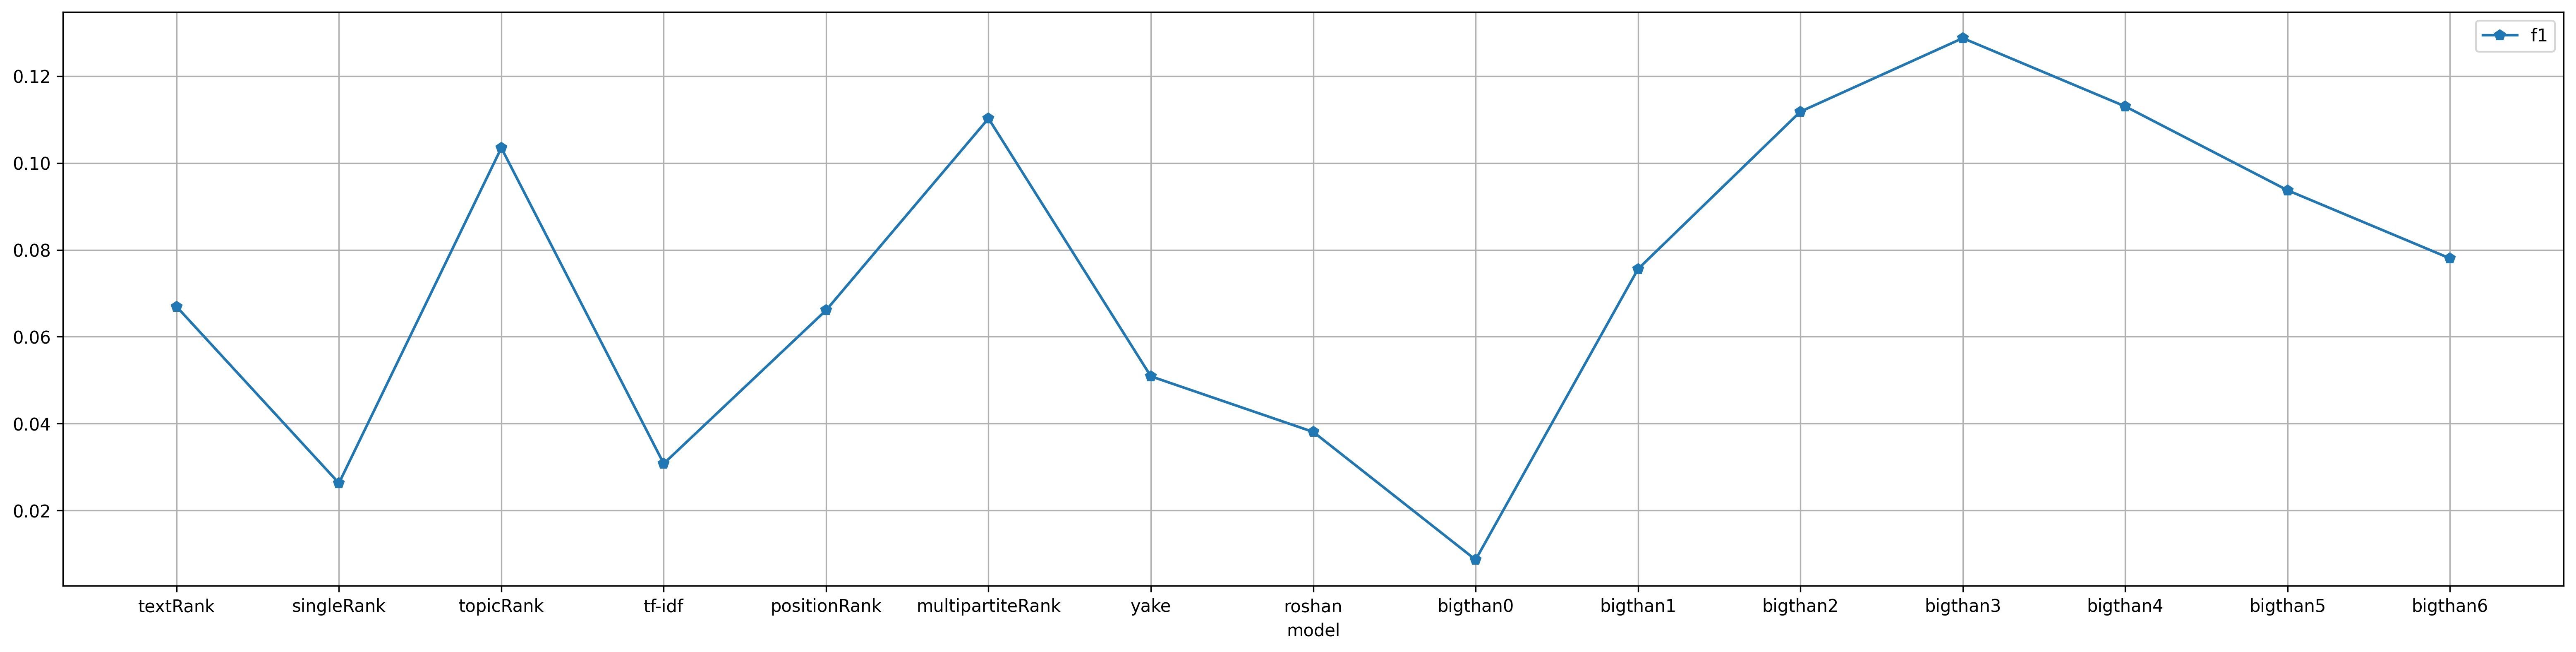

In [ ]:
fig = plt.figure(dpi=300)
sd.plot(figsize=(26,6),grid=True,ax=plt.gca(),marker='p')
# plt.plot()
plt.xticks([i for i in range(sd.shape[0])],top)
plt.savefig('./f1.png',bbox_inches='tight')

<Axes: xlabel='model'>

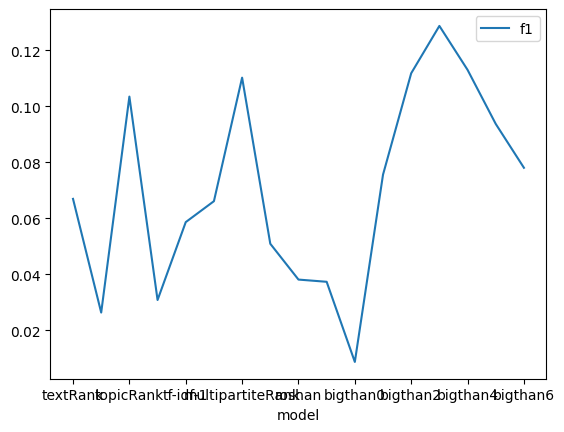

In [ ]:
sd.drop('model',axis=1).plot()

# noun adj with position

In [4]:
from hazm import *

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_17.csv')
df

,Unnamed: 0,body,keywords,cleaned_body,textRank,singleRank,topicRank,tf-idf,tf-idf-1,positionRank,...,NOUN_ADJ_2,roshan,cleaned_roshan,bigthan0,bigthan1,bigthan2,bigthan3,bigthan4,bigthan5,bigthan6
0,0,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,رو...","جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...","شیخ صدوق ره,مبانی,رد روایات اعتقاد,نتایج علمی,...","شیخ, فقه, خویش, روایات, حیطه, بیانی","الحدیثی, فقه الحدیثی, صدوق, شیخ صدوق, شیخ, صدو...","الحدیثی,صدوق,روش شیخ,نوشتار,روایات,روش تبیینی وی",...,نوشتار الحدیثی الاخبار شیخ صدوق ره روش مبانی د...,",روش فقه,مطابقت مبانی,موارد روش‌های,رد روایات,...",",روش‌های فقه,رد روایات,روش فقه,مطابقت مبانی,مو...","صدوق ره روش,صدوق ره روش مبانی,صدوق ره روش مبان...","ق,شیخ صدوق ره,صدوق,صدوق ره,ره,روش,مبانی,پژوهش,...","یثی,الحدیثی,شیخ,شیخ صدوق,صدوق,صدوق ره,ره,روش,م...","لحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی,روا...","الحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی,رو...","الحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی,رو...","الحدیثی,الحدیثی,شیخ,شیخ صدوق,صدوق,روش,مبانی"
1,1,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...,"سیاست خارجی توسعه سیاسی,رویکرد توسعه‌ای دولت‌ه...",مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...,"سیاست خارجی اولویت توسعه سیاسی,توسعه,نهادهای م...","دولت, به توسعه, توسعه, هفتم, در سیاست","دولت های, نهادهای مدنی, دولت های هفتم هشتم, دو...","پژوهش,توسعه,اولویت توسعه,توسعه سیاسی,سیاست خار...",...,پژوهش دولت توسعه آدریان ویچ پیتر ایوانز توسعه ...,",نتیجه توسعه,تفاوت رویکردی,روش تحلیل,رویکرد,او...",",نتیجه توسعه,تفاوت رویکردی,پیوند توسعه,رویکرده...","وسعه,بررسی,بررسی چگونگی,بررسی چگونگی رویکرد,بر...","عه ای دولت,توسعه ای دولت های,ای,ای دولت,ای دول...","های,دولت های هفتم,دولت های هفتم هشتم,های هفتم,...","عه,رویکرد,ای,دولت های,های,موجب,اتخاذ,نسبت,تفاو...","وسعه,رویکرد,دولت های,های,سیاست,سیاسی","ت,توسعه,دولت های,های","ت,توسعه,دولت های,های"
2,2,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"ترجمه قرآن کریم محمد یزدی بیان,ترجمه قرآن محمد...","ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...","مستلزم ترجمه,آیات قرآن ابراز,آیات قرآن کریم","ترجمه, تفسیری, محمد","ترجمه, در ترجمه, ترجمه ای","تدبر,تدبر آنان,چه",...,فهم عمیق تدبر آیات قرآن کریم چه بیشتر های رو ا...,",تفسیر نقش,ترجمه به‌گونه‌ای,مفاهیم بلند,ترجمه‌...",",تفسیر خاص,ترجمه به‌گونه‌ای,تفسیر نقش,زمینه فه...","مستلزم ترجمه,چه بیشتر مستلزم ترجمه زبان,بیشتر...","ن کریم,کریم,بیشتر,ترجمه,زبان,مترجم,ترجمه‌ای,دق...","ن,قرآن,قرآن کریم,کریم,ترجمه,مترجم,ترجمه‌ای,تفس...","آن,قرآن کریم,کریم,ترجمه,ترجمه‌ای,تفسیری,ترجمه ...","ت,قرآن,ترجمه,تفسیری","ت,قرآن,ترجمه,تفسیری","آن,ترجمه,تفسیری"
3,3,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...,"آزادی بیان و,و بیان آزادی,و امه علیهم السلام,آ...","بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...","دین,آزادی موهبتی,انسان عطا,اسلام,آزادی قلم,قال...","آزادی, قلم, بیان می, قال به, بیان, در عین, امه...","آزادی بیان, آزادی, آزادی نطق, نطق, شود اسلام, ...","بیان آزادی,آزادی,انسان,بیان,موهبتی,اسلام,عطا,دین",...,آزادی موهبتی الهی متعال انسان عطا انسان ضعیف ع...,",مسلمانان قائل,حریم دین,آزادی قلم,کتمان حق,مقد...",",مردم واجب,آزادی قلم,حریم دین,کتمان حق,کمال,ام...",",ضعیف حجت درونی,ضعیف حجت درونی عقل,ضعیف حجت در...","عین,پیامبر,امه,می,اسلام,های,می و,و بیان,بیان,ق...","ن,و,می,اسلام,می و,و بیان,بیان,آزادی بیان,قلم,دین",",و,می,اسلام,بیان,آزادی بیان","دی,و,می,بیان","دی,و,می,بیان","دی,و,می,بیان"
4,4,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"اصل آزادی بیان موضع,توحید مجال بیان عقاید,نوع ...","نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...","سیاسی,دین,مرتضی مطهری,نفی آزادی ری,تفسیر

In [6]:
tagger = POSTagger(model='/content/drive/MyDrive/Roshan Project/pos_tagger.model')


In [7]:
post = list(['NOUN','NOUN,EZ', 'ADJ,EZ','ADJ'])
post

['NOUN', 'NOUN,EZ', 'ADJ,EZ', 'ADJ']

In [8]:

Post1 = []
Post2 = []
# post = set(('NOUN','NOUN,EZ', 'ADJ,EZ','ADJ'))
for i in df['cleaned_body'][0:300]:
    # post1 = []
    # post2 = []
    k = tagger.tag(i.split())
    # print(tagger.tag(i.split())[0][0])
    post1 = ''
    post2 = ''
    for k_ in k:
        if k_[1] in post:
            post1 += " " + k_[0]
            post2 += " " + k_[1]

            # post1.append(k_[0])
            # post2.append(k_[1])

    Post1.append(post1[1:])
    Post2.append(post2[1:])


In [9]:

Post1 = []
Post2 = []
# post = set(('NOUN','NOUN,EZ', 'ADJ,EZ','ADJ'))
for i in df['keywords'][0:300]:
    # post1 = []
    # post2 = []
    k = tagger.tag(i.split())
    # print(tagger.tag(i.split())[0][0])
    post1 = ''
    post2 = ''
    for k_ in k:
        if k_[1] in post:
            post1 += " " + k_[0]
            post2 += " " + k_[1]

            # post1.append(k_[0])
            # post2.append(k_[1])

    Post1.append(post1[1:])
    Post2.append(post2[1:])


In [10]:
Post2[0]

'NOUN,EZ NOUN NOUN NOUN,EZ NOUN ADJ,EZ NOUN,EZ NOUN NOUN,EZ NOUN'

In [11]:
SS = pd.DataFrame()
SS['post1'] = Post1
SS['post2'] = Post2

In [12]:
SS['keywords'] = df['keywords'][0:300]

In [13]:
SS

,post1,post2,keywords
0,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...","NOUN,EZ NOUN NOUN NOUN,EZ NOUN ADJ,EZ NOUN,EZ ...","فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ..."
1,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...","NOUN NOUN,EZ NOUN,EZ NOUN,EZ NOUN NOUN NOUN,EZ...","سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت..."
2,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن","NOUN,EZ NOUN NOUN,EZ NOUN,EZ NOUN","جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن"
3,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...","NOUN,EZ ADJ,EZ NOUN,EZ NOUN NOUN,EZ ADJ","محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک..."
4,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...","NOUN NOUN NOUN NOUN NOUN,EZ NOUN,EZ ADJ","آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی..."
...,...,...,...
295,"ادراک کارکنان,بانک مرکزی جمهوری اسلامی ایران,ا...","NOUN,EZ NOUN,EZ ADJ,EZ NOUN,EZ ADJ NOUN,EZ ADJ...","ادراک کارکنان,بانک مرکزی جمهوری اسلامی ایران,ا..."
296,"حکمرانی الهی,جهانی شدن,صلح پایدار,اسلام شیعی,ف...","NOUN,EZ NOUN NOUN NOUN,EZ NOUN","حکمرانی الهی,جهانی شدن,صلح پایدار,اسلام شیعی,ف..."
297,"شهید مرتضی مطهری,آیت‌الله مصباح یزدی,شر,عدل الهی","NOUN NOUN NOUN NOUN,EZ NOUN,EZ ADJ","شهید مرتضی مطهری,آیت‌الله مصباح یزدی,شر,عدل الهی"
298,"حضرت عیسی ع ,عرفان اسلامی,قصه,حضرت نوح ع","NOUN,EZ NOUN NOUN NOUN,EZ NOUN NOUN NOUN","حضرت عیسی ع ,عرفان اسلامی,قصه,حضرت نوح ع"


In [14]:
post = {'NOUN':1,'NOUN,EZ':2, 'ADJ,EZ':3,'ADJ':4}

In [15]:
# this time for keywords
Post1 = []
Post2 = []
# post = set(('NOUN','NOUN,EZ', 'ADJ,EZ','ADJ'))
for i1 in df['keywords'][0:300]:
    # post1 = []
    # post2 = []
    for i in i1.split(','):
        k = tagger.tag(i.split())
        # print(tagger.tag(i.split())[0][0])
        post1 = ''
        post2 = ''
        for k_ in k:
            if k_[1] in post.keys():
                post1 += " " + k_[0]
                post2 += " " + str(post[k_[1]])

                # post1.append(k_[0])
                # post2.append(k_[1])
        l_ = post1.split()
        l2_ = post2.split()
        while len(l_) <= 5:
            post1 += " " + "None"
            post2 += " " + "0"
            l_ = post1.split()
            l2_ = post2.split()
        if len(l_) >5:
            pos1 = ''
            pos2 = ''
            for i,j in zip(l_[0:6],l2_[0:6]):
                pos1 += " " + i
                pos2 += " " + j
        post1 = pos1
        post2 = pos2


        Post1.append(post1[1:])
        Post2.append(post2[1:])


In [16]:
Post1

['فقه الحدیث None None None None',
 'معانی الاخبار None None None None',
 'روش فقه الحدیثی None None None',
 'چینش هندسی روایات None None None',
 'شیخ صدوق None None None None',
 'مبانی فقه الحدیثی None None None',
 'سید محمد خاتمی None None None',
 'آدریان لفت ویچ None None None',
 'پیتر ایوانز None None None None',
 'دولت توسعه گرا None None None',
 'محمود احمدی نژاد None None None',
 'جایگاه آرا تفسیری None None None',
 'محمد یزدی None None None None',
 'ترجمه قرآن None None None None',
 'محدودیت بازدارنده None None None None',
 'آزادی بیان None None None None',
 'بدعت None None None None None',
 'دین None None None None None',
 'ارتداد None None None None None',
 'کتب ضلال None None None None',
 'اهانت مقدسات None None None None',
 'قانون مدنی None None None None',
 'آزادی None None None None None',
 'محمد تقی مصباح یزدی None None',
 'مرتضی مطهری None None None None',
 'دموکراسی None None None None None',
 'تفسیر دین None None None None',
 'اندیشه سیاسی None None None None',
 'تفسی

In [17]:
keywords_pos = pd.DataFrame()
keywords_pos['pos1'] = Post1
keywords_pos['pos2'] = Post2


In [18]:
# keywords_pos.to_csv('/content/drive/MyDrive/Roshan Project/keywords_pos.csv',index=False)

In [19]:
keywords_pos

,pos1,pos2
0,فقه الحدیث None None None None,1 1 0 0 0 0
1,معانی الاخبار None None None None,2 1 0 0 0 0
2,روش فقه الحدیثی None None None,2 2 1 0 0 0
3,چینش هندسی روایات None None None,2 3 1 0 0 0
4,شیخ صدوق None None None None,2 1 0 0 0 0
...,...,...
1772,اندیشه سیره سیاسی None None None,1 2 4 0 0 0
1773,عزل نصب None None None None,1 1 0 0 0 0
1774,ماکیاولی None None None None None,1 0 0 0 0 0
1775,نهج البلاغه None None None None,1 1 0 0 0 0


In [20]:
# s = {'0':0,'1':0,'2':0,'3':0}
# for i1,i2,i3,i4 in zip(Post2,Post2[1:],Post2[2:],Post2[3:]):
#     if


In [21]:
s = {'0':0,'1':1,'2':2,'3':3,'4':4}
for i in Post2:
    for i1 in s.keys():
        if i1 in i.split():
            s[i1]+=1

In [22]:
s

{'0': 1762, '1': 1076, '2': 1281, '3': 110, '4': 744}

In [23]:
from collections import Counter
c = Counter()
for i in Post2:
    c.update(i)
c

Counter({'1': 1298, ' ': 8885, '0': 6998, '2': 1492, '3': 115, '4': 759})

In [24]:
l_ = ['1','2','3','4']

In [25]:
Ss = np.zeros((4,4),dtype='int32')
Ss

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

In [26]:
for i1 in range(1,5):
    for i2 in range(1,5):
        for i in Post2:
            # for j1,j2,j3,j4 in zip(i,i[1:],i[2:],i[3:]):
            # if int(i.split()[0])==i1 and int(i.split()[1])==i2:
            if f'{i1} {i2}' in i:
                Ss[i1-1][i2-1] += 1


In [27]:
post2 = {'NOUN':0,'NOUN,EZ':1, 'ADJ,EZ':2,'ADJ':3}
post2

{'NOUN': 0, 'NOUN,EZ': 1, 'ADJ,EZ': 2, 'ADJ': 3}

In [28]:
t = pd.DataFrame(Ss,columns=list(post2.keys()))
t.index = list(post2.keys())
# t/t.sum(axis=0)
t

,NOUN,"NOUN,EZ","ADJ,EZ",ADJ
NOUN,156,50,1,6
"NOUN,EZ",499,152,103,692
"ADJ,EZ",72,9,3,31
ADJ,14,15,3,14


In [29]:
df['NOUN_ADJ'],df['keywords']

(0      نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...
 1      چکیده پژوهش چارچوب نظری دولت توسعه گرای آدریان...
 2      فهم معانی عمیق تدبر آیات قرآن کریم بهره‌مندی چ...
 3      آزادی موهبتی الهی خدای متعال انسان عطا انسان م...
 4      نکاتی توجه پژوهشگران اندیشه‌های سیاسی اجتماعی ...
                              ...                        
 445    پژوهش حاضر هدف بررسی رابطه رضایت شغلی تعهد ساز...
 446    سازمان ملل متحد دهه های اخیر تغییر ساختار عملک...
 447    تفسیرهای فقهی قدیمی‌ترین تفاسیری قرن دوم تدوین...
 448    هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...
 449    هدف پژوهش حاضر تبیین رابطه بین جهت گیری زندگی ...
 Name: NOUN_ADJ, Length: 450, dtype: object,
 0      فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...
 1      سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...
 2                 جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن
 3      محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...
 4      آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...
                           

In [30]:
# 09199367030

# how many time the keywords are repeated
g1 = []
g2 = []
g_1 = 0
g_2 = 0
k_0 = []
for ids,idf in zip(df['NOUN_ADJ'],df['keywords']):
    f = dict()
    f1 = ids.split()
    for i,j,k,l,m in zip(f1,f1[1:],f1[2:],f1[3:],f1[4:]):
        if f.get(i):
            f[i] += 1
        else:
            f[i] = 1

        ij = f'{i} {j}'
        if f.get(ij):
            f[ij] += 1
        else:
            f[ij] = 1

        ijk = f'{i} {j} {k}'
        if f.get(ijk):
            f[ijk] += 1
        else:
            f[ijk] = 1

        ijkl = f'{i} {j} {k} {l}'
        if f.get(ijkl):
            f[ijkl] += 1
        else:
            f[ijkl] = 1

        ijklm = f'{i} {j} {k} {l} {m}'
        if f.get(ijklm):
            f[ijklm] += 1
        else:
            f[ijklm] = 1
    llkm = ""
    for i in idf.split(','):
        try:
            # print(i,f[i])
            if f[i] > 2:
                g_1 += 1
                g1.append(f[i])
                llkm = llkm + ',' + i
                llkm = llkm[1:]
            else:
                g2.append(1)
        except:
                g2.append(1)
    k_0.append(llkm)

In [31]:
k_0

['شیخ صدوق',
 '',
 'حمد یزدی,ترجمه قرآن',
 'زادی بیان,دین',
 'زادی,اندیشه سیاسی',
 'روایات تفسیری',
 'لوم تجربی,پیشرفت درسی',
 'فیت زندگی,معنویت درمانی,رضایت زناشویی',
 'هیم دانش,یادگیری,فرهنگ یادگیری',
 'وش سازمانی,مدیریت دانش',
 'انشگاه دولتی,پذیرش دانشجو',
 '',
 '',
 'نتروپی,منطق فازی',
 'محمد عزه دروزه',
 '',
 'صول فقه,آیات قرآن',
 'نسخ',
 'دین گریزی',
 '',
 '',
 'اب نزول,اشتراک لفظی,ترادف,ابن عاشور',
 'نبوت',
 'ادیه اروپایی,تروریسم,انرژی هسته\u200cای,جمهوری اسلامی ایران',
 'اجتهاد',
 'هوری اسلامی ایران,قانون اساسی,احزاب',
 '',
 'حقوق عمومی',
 'اختلاف نقل',
 '',
 'هد سازمانی,رضایت شغلی,اخلاق اسلامی',
 'فکر انتقادی,اخلاق باور',
 '',
 'یط کار,معنویت محیط کار,معنویت',
 'اخلاق فضیلت',
 'گی,دلبستگی شغلی,اخلاق کار,ارزش,رفتار شهروندی سازمانی,اخلاق کار اسلامی',
 'فرسودگی شغلی',
 ' سازمانی,اخلاق کار,رضایت شغلی,کارکنان,اخلاق کار اسلامی',
 'لاق کاری اسلامی,رضایت شغلی,انگیزش درونی',
 '',
 '',
 '',
 '',
 'رتباطات انسانی,ارتباط',
 '',
 '',
 '',
 'ت,عقل,استدلال,عقل عملی',
 'نقلاب اسلامی,اسلام سیا

In [32]:
# np.divide(Ss.T,Ss.T.sum(axis=0))


In [33]:
# np.divide(Ss,Ss.sum(axis=0))
# for p in range(5):
    # Ss2[p] = Ss.T[p] / Ss.T[p].sum()

In [34]:
# Ss2.T

In [35]:
Ss2 = np.zeros((5,5))
Ss2

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [36]:
for i1,i2 in enumerate(l_):
    for j1,j2 in enumerate(l_):


SyntaxError: ignored

In [37]:
Ss = np.zeros((4,4))
Ss

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [38]:
Post2

['1 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 2 1 0 0 0',
 '2 3 1 0 0 0',
 '2 1 0 0 0 0',
 '2 2 1 0 0 0',
 '1 2 1 0 0 0',
 '1 2 1 0 0 0',
 '1 1 0 0 0 0',
 '2 2 1 0 0 0',
 '2 1 1 0 0 0',
 '2 2 1 0 0 0',
 '2 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '1 0 0 0 0 0',
 '1 0 0 0 0 0',
 '1 0 0 0 0 0',
 '2 1 0 0 0 0',
 '1 1 0 0 0 0',
 '2 4 0 0 0 0',
 '1 0 0 0 0 0',
 '1 1 2 1 0 0',
 '1 1 0 0 0 0',
 '1 0 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '1 1 0 0 0 0',
 '1 0 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '1 2 1 0 0 0',
 '2 1 0 0 0 0',
 '1 1 0 0 0 0',
 '2 3 1 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 1 0 0 0',
 '2 1 0 0 0 0',
 '2 2 3 4 3 2',
 '1 0 0 0 0 0',
 '1 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '0 0 0 0 0 0',
 '2 2 4 2 1 0',
 '2 2 4 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '1 0 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 2 3 1 0 0',
 '2 4 0 0 0 0',
 '1 0 0 

In [39]:
df['bigthan2']

0      یثی,الحدیثی,شیخ,شیخ صدوق,صدوق,صدوق ره,ره,روش,م...
1      های,دولت های هفتم,دولت های هفتم هشتم,های هفتم,...
2      ن,قرآن,قرآن کریم,کریم,ترجمه,مترجم,ترجمه‌ای,تفس...
3       ن,و,می,اسلام,می و,و بیان,بیان,آزادی بیان,قلم,دین
4      یدی,متفکری,تفسیر,نوع,نوع خاصی,خاصی,تفاسیر,متون...
                             ...                        
445    ضایت شغلی,رضایت شغلی تعهد,رضایت شغلی تعهد سازم...
446    ار عملکرد,عملکرد,حقوق,کمیسیون,حقوق بشر,بشر,شور...
447          ت,تفسیر,می,قواعد,تفسیری,نظر,نظر گرفتن,گرفتن
448                               یق,می,استفاده,پرسشنامه
449    یت زندگی,کیفیت زندگی کاری,زندگی کاری,کاری,عملک...
Name: bigthan2, Length: 450, dtype: object

In [40]:
df['cleaned_body'][0:1][0]

'این نوشتار بر آن است تا با بررسی فقه الحدیثی کتاب معانی الاخبار اثر شیخ صدوق ره به روش و مبانی ایشان دست یابد در پژوهش به عمل آمده با کنکاش در روایات نتیجه ذیل حاصل گردید که شیخ صدوق ره چه در حیطه مبانی و چه در حیطه روش با دو سبک بیانی و تبیینی به بیان مطالب فقه الحدیثی خویش پرداخته است مواقعی که صدوق ره مبانی و روش های فقه الحدیثی خویش را با نقل روایت بیان نموده و آن را بدون هیچ توضیح و اضافاتی مسکوت می گذارد حکایت از مبانی یا روش بیانی ایشان دارد و در پاره ای مواقع که بیانات و اضافات خویش را به دنبال روایت قید می نماید مبانی یا روش تبیینی وی در نظر گرفته شده است از جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد به عصمت و علم انبیاء و امه اطهار علیهم السلام تقدم نص بر عقل با حفظ جایگاه عقل در پذیرش یا رد روایات اعتقاد به لزوم تقیه می باشد تشکیل خانواده حدیثی و چینش هندسی روایات تفسیر روایات با قرآن و روایات نیز به عنوان نمونه از موارد روش های فقه الحدیثی ایشان است نویسنده با ذکر شواهدی در این راستا میداتی بر نتایج علمی خویش اراه نموده است از مهمترین نتایچ این پژوهش که مقوله ای بدیع است مطابق

In [41]:
df['keywords'][0:1][0]

'فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش هندسی روایات,شیخ صدوق,مبانی فقه الحدیثی'

# Huging face

# 1

In [42]:
Post2

['1 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 2 1 0 0 0',
 '2 3 1 0 0 0',
 '2 1 0 0 0 0',
 '2 2 1 0 0 0',
 '1 2 1 0 0 0',
 '1 2 1 0 0 0',
 '1 1 0 0 0 0',
 '2 2 1 0 0 0',
 '2 1 1 0 0 0',
 '2 2 1 0 0 0',
 '2 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '1 0 0 0 0 0',
 '1 0 0 0 0 0',
 '1 0 0 0 0 0',
 '2 1 0 0 0 0',
 '1 1 0 0 0 0',
 '2 4 0 0 0 0',
 '1 0 0 0 0 0',
 '1 1 2 1 0 0',
 '1 1 0 0 0 0',
 '1 0 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '1 1 0 0 0 0',
 '1 0 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '1 2 1 0 0 0',
 '2 1 0 0 0 0',
 '1 1 0 0 0 0',
 '2 3 1 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 1 0 0 0',
 '2 1 0 0 0 0',
 '2 2 3 4 3 2',
 '1 0 0 0 0 0',
 '1 1 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '0 0 0 0 0 0',
 '2 2 4 2 1 0',
 '2 2 4 0 0 0',
 '2 4 0 0 0 0',
 '2 1 0 0 0 0',
 '1 0 0 0 0 0',
 '2 1 0 0 0 0',
 '2 4 0 0 0 0',
 '2 4 0 0 0 0',
 '2 2 3 1 0 0',
 '2 4 0 0 0 0',
 '1 0 0 

In [43]:
p = {}
for i in Post2:
    for i0,i1,i2,i3,i4,i5 in zip(i,i[2:],i[4:],i[6:],i[8:],i[10:]):
        # print(i0[0])
        # break
        if i0[0] == str(0):
            continue
        if p.get(i0[0]):
            p[i0[0]] += 1
        else:
            p[i0[0]] = 1

        if i1[0] == str(0):
            continue
        if p.get(f'{i0[0]} {i1[0]}'):
            p[f'{i0[0]} {i1[0]}'] += 1
        else:
            p[f'{i0[0]} {i1[0]}'] = 1

        if i2[0] == str(0):
            continue
        if p.get(f'{i0[0]} {i1[0]} {i2[0]}'):
            p[f'{i0[0]} {i1[0]} {i2[0]}'] += 1
        else:
            p[f'{i0[0]} {i1[0]} {i2[0]}'] = 1

        if i3[0] == str(0):
            continue
        if p.get(f'{i0[0]} {i1[0]} {i2[0]} {i3[0]}'):
            p[f'{i0[0]} {i1[0]} {i2[0]} {i3[0]}'] += 1
        else:
            p[f'{i0[0]} {i1[0]} {i2[0]} {i3[0]}'] = 1

        if i4[0] == str(0):
            continue
        if p.get(f'{i0[0]} {i1[0]} {i2[0]} {i3[0]} {i4[0]}'):
            p[f'{i0[0]} {i1[0]} {i2[0]} {i3[0]} {i4[0]}'] += 1
        else:
            p[f'{i0[0]} {i1[0]} {i2[0]} {i3[0]} {i4[0]}'] = 1

        if i5[0] == str(0):
            continue
        if p.get(f'{i0[0]} {i1[0]} {i2[0]} {i3[0]} {i4[0]} {i5[0]}'):
            p[f'{i0[0]} {i1[0]} {i2[0]} {i3[0]} {i4[0]} {i5[0]}'] += 1
        else:
            p[f'{i0[0]} {i1[0]} {i2[0]} {i3[0]} {i4[0]} {i5[0]}'] = 1

In [44]:
l1 = {}
l2 = {}
l3 = {}
for i in sorted(p.items(),key=lambda x:x[1],reverse=True)[0:30]:
    if len(i[0].split()) == 1:
        l1[i[0]] = i[1]
    if len(i[0].split()) == 2:
        l2[i[0]] = i[1]
    if len(i[0].split()) == 3:
        l3[i[0]] = i[1]

l1,l2,l3

({'2': 1239, '1': 520, '4': 13},
 {'2 4': 598, '2 1': 407, '2 2': 144, '1 1': 118, '2 3': 88, '1 2': 32},
 {'2 2 4': 70,
  '2 3 1': 55,
  '2 2 1': 44,
  '2 1 1': 26,
  '2 3 4': 24,
  '1 2 1': 23,
  '2 2 2': 20,
  '1 1 1': 17,
  '2 4 4': 10,
  '2 4 1': 9,
  '2 2 3': 8,
  '2 4 2': 7,
  '1 2 4': 7,
  '2 3 2': 6,
  '2 1 2': 6,
  '1 1 2': 4})

In [45]:
l_ = l1
su = np.sum(list(l_.values()))
for i in l_.keys():
    l_[i] = l_[i] / su
l1 = l_
l_ = l2
su = np.sum(list(l_.values()))
for i in l_.keys():
    l_[i] = l_[i] / su
l2 = l_
l_ = l3
su = np.sum(list(l_.values()))
for i in l_.keys():
    l_[i] = l_[i] / su
l3 = l_

In [46]:
l1,l2,l3

({'2': 0.6992099322799097,
  '1': 0.29345372460496616,
  '4': 0.007336343115124154},
 {'2 4': 0.43114635904830567,
  '2 1': 0.29343907714491707,
  '2 2': 0.10382119682768565,
  '1 1': 0.08507570295602018,
  '2 3': 0.06344628695025234,
  '1 2': 0.023071377072819033},
 {'2 2 4': 0.20833333333333334,
  '2 3 1': 0.1636904761904762,
  '2 2 1': 0.13095238095238096,
  '2 1 1': 0.07738095238095238,
  '2 3 4': 0.07142857142857142,
  '1 2 1': 0.06845238095238096,
  '2 2 2': 0.05952380952380952,
  '1 1 1': 0.050595238095238096,
  '2 4 4': 0.02976190476190476,
  '2 4 1': 0.026785714285714284,
  '2 2 3': 0.023809523809523808,
  '2 4 2': 0.020833333333333332,
  '1 2 4': 0.020833333333333332,
  '2 3 2': 0.017857142857142856,
  '2 1 2': 0.017857142857142856,
  '1 1 2': 0.011904761904761904})

In [47]:
p

{'1': 520,
 '1 1': 118,
 '2': 1239,
 '2 1': 407,
 '2 2': 144,
 '2 2 1': 44,
 '2 3': 88,
 '2 3 1': 55,
 '1 2': 32,
 '1 2 1': 23,
 '2 1 1': 26,
 '2 4': 598,
 '1 1 2': 4,
 '1 1 2 1': 2,
 '2 4 1': 9,
 '2 2 3': 8,
 '2 2 3 4': 2,
 '2 2 3 4 3': 1,
 '2 2 3 4 3 2': 1,
 '2 2 4': 70,
 '2 2 4 2': 5,
 '2 2 4 2 1': 5,
 '2 2 3 1': 4,
 '1 1 1': 17,
 '2 3 2': 6,
 '2 3 2 3': 3,
 '2 3 2 3 1': 3,
 '2 2 1 1': 7,
 '2 2 2': 20,
 '2 2 2 1': 10,
 '2 2 2 1 2': 1,
 '2 2 2 1 2 1': 1,
 '2 2 2 4': 5,
 '2 2 1 2': 2,
 '2 2 1 2 2': 2,
 '2 2 1 2 2 1': 2,
 '2 3 4': 24,
 '2 1 4': 2,
 '2 4 4': 10,
 '4': 13,
 '4 4': 3,
 '4 2': 1,
 '4 2 1': 1,
 '2 4 2': 7,
 '2 4 2 1': 4,
 '3': 2,
 '3 1': 2,
 '2 1 2': 6,
 '2 1 2 4': 2,
 '2 3 2 4': 2,
 '1 1 1 1': 4,
 '1 1 1 1 1': 1,
 '2 2 2 1 1': 2,
 '2 2 2 1 1 1': 2,
 '2 1 1 1': 4,
 '2 3 2 2': 1,
 '2 3 2 2 4': 1,
 '2 4 2 4': 2,
 '1 2 4': 7,
 '2 4 3': 1,
 '2 4 3 1': 1,
 '1 1 1 1 4': 1,
 '1 1 1 2': 1,
 '1 1 1 2 4': 1,
 '2 4 4 2': 1,
 '2 4 4 2 4': 1,
 '1 1 4': 1,
 '1 1 4 2': 1,
 '1 1 4 2 4': 1,

In [48]:
i = 'حالا چی,سلام رضا حالت چطوره'

In [49]:
i = df['bigthan1'][0]

In [50]:
post2 = {'NOUN':1,'NOUN,EZ':2, 'ADJ,EZ':3,'ADJ':4}
post2

{'NOUN': 1, 'NOUN,EZ': 2, 'ADJ,EZ': 3, 'ADJ': 4}

In [51]:
np.array([1,1,0]).all() == 1

False

In [52]:
s1 = []
for u in sorted(p.items(),key=lambda x:x[1],reverse=True)[0:30]:
    s1.append(u[0])

In [53]:
s1

['2',
 '2 4',
 '1',
 '2 1',
 '2 2',
 '1 1',
 '2 3',
 '2 2 4',
 '2 3 1',
 '2 2 1',
 '1 2',
 '2 1 1',
 '2 3 4',
 '1 2 1',
 '2 2 2',
 '1 1 1',
 '4',
 '2 2 2 1',
 '2 4 4',
 '2 4 1',
 '2 2 3',
 '2 2 1 1',
 '2 4 2',
 '1 2 4',
 '2 3 2',
 '2 1 2',
 '2 2 4 2',
 '2 2 4 2 1',
 '2 2 2 4',
 '1 1 2']

In [54]:
def g(x):
    tresh_1 = 0.2
    tresh_2 = 0.2
    tresh_3 = 0.1
    f = ''
    f_check = []
    try:
        x = x.split(',')
        mk = []
        for lk,sample in enumerate(x):
            # print(sample,len(sample))
            if len(sample) > 3:
                mk.append(sample)
        x = mk
        for i0 in x:
            i1 = tagger.tag(i0.split())
            f1 = ''
            if len(i1) > 3:
                continue
            for i2 in i1:
                # if i2[1] in post2.keys():
                if i2[1] in post2.keys():
                    # print(i2[1])
                    f_check.append(1)
                    f1 += ' ' + str(post2[i2[1]])
                else:f_check.append(0)

            if np.array(f_check).all() == 1:
                # if
                try:
                    if len(f1.split()) == 1 and l1[f1[1:]] > tresh_1:
                        f += "," + i0
                except:pass
                try:
                    if len(f1.split()) == 2 and l2[f1[1:]] > tresh_2:
                        f += "," + i0
                except:pass
                try:
                    if len(f1.split()) == 3 and l3[f1[1:]] > tresh_3:
                        f += "," + i0
                except:pass
        return f
    except: return 'none'

In [55]:
g(i)

',صدوق,مبانی,پژوهش,روایات,حیطه,بیانی,تبیینی,بیان,مبانی روش,روش های,روایت,اعتقاد,چینش,چینش هندسی,چینش هندسی روایات,هندسی'

In [79]:
df.loc[300]['body']

'این پایان نامه به بررسی عقل عملی در آراء ارسطو، ابن سینا و آکویناس می پردازد. از دیدگاه ارسطو عقل نظری و عقل عملی  دو قوه ی متمایز از هم نیستند، بلکه دو وجه از یک قوه هستند. عقل عملی از عقل نظری با توجه به متعلقات ادراک متمایز می شود. عقل عملی صرف ابزار نیست، بلکه مرتبط با غایت می باشد. عقل عملی ، عقلی فضیلت مند است و مهمترین فضیلت آن حکمت عملی است، که نقش محوری در اخلاق ارسطو ایفاء می کند و معیار و میزان ما برای فعل اخلاقی می باشد و مهمترین مشخصه ی آن انتخاب است. ارسطو حکمت عملی و فضایل اخلاقی را لازم و ملزوم هم می داند. به زعم ابن سینا عقل نظری و عقل عملی، ماهیتاً متمایز هستند، و تفاوت آنها به اختلاف در مُدرَک\u200cها یا نحوه علم و درک محدود نمی\u200cشود؛ بلکه یکی از سنخ ادراک، و دیگری از سنخ فعل است. عقل عملی منشا اخلاق بوده و فضیلت و رذیلت در ارتباط عقل عملی با قوای بدنی معنا پیدا می کند، به نحوی که اگر قوای بدنی مقهور عقل شود، فضیلت و در غیر این صورت رذیلت خواهد بود. از دیدگاه آکویناس عقل نظری و عملی دو قوه ی متمایز نیستند و تمایز میان این دو عقل در غایت نهایی آنهاست. عقل عملی دا

In [57]:
df2 = df[['keywords', 'textRank',
       'singleRank', 'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank',
       'multipartiteRank', 'yake', 'roshan',
        'bigthan0', 'bigthan1', 'bigthan2', 'bigthan3',
       'bigthan4', 'bigthan5', 'bigthan6']][300:].copy()

In [499]:
df2

,keywords,textRank,singleRank,topicRank,tf-idf,tf-idf-1,positionRank,multipartiteRank,yake,roshan,bigthan0,bigthan1,bigthan2,bigthan3,bigthan4,bigthan5,bigthan6
300,"ابن‌ سینا حسین‌بن عبدالله,ابن سینا,عقل نظری,ر...","عقل عملی عقلی فضیلت,ارتباط عقل عملی,دیدگاه ارس...","فیلسوف عقل عملی عقلی فضیلت مند,عقل عملی عقلی ف...","بررسی عقل عملی,دیدگاه ارسطو عقل نظری,حکمت عملی...","فضایل, عقل, عملی, فضیلت, قوه, ادراک, اخلاقی, ا...","عقل عملی, آکویناس, ارسطو, دو قوه, عقل نظری, فض...","ارسطو,ابن‌سینا,پایان‌نامه,آکویناس عقل,آکویناس,...","بررسی عقل عملی,دیدگاه ارسطو عقل نظری,حکمت عملی...","آکویناس عقل نظری,عقل عملی عقلی,عملی عقلی فضیلت...",",فضیلت مند,قوه‌ی متمایز,بررسی عقل,متعلقات ادرا...","ه ارسطو عقل نظری عقل,ارسطو عقل,ارسطو عقل نظری,...","ی عقل عملی,نظری,نظری عقل,نظری عقل عملی,عملی قو...","بن سینا,سینا,آکویناس,می,دیدگاه,عقل نظری,نظری,ع...","ی,ارسطو,آکویناس,می,عقل نظری,نظری,قوه,ی,متمایز,...","عملی,ارسطو,آکویناس,می,عقل نظری,نظری,قوه,ی,فضیل...","ل عملی,عملی,می,ی,اخلاقی,فضایل","قل عملی,عملی,می,ی,اخلاقی"
301,"امام محمد غزالی,عقل,ابوالحسن عامری,توماس اسپری...","حل بحران اندیشه سیاسی,روشن‌تر شدن نحوه مواجهه,...","حل بحران اندیشه سیاسی دینی,روش جستاری توماس اس...","عقل,شرع,تفکر اسلامی,نظریه بحران,حوزه اندیشه سی...","شرع, عقل, جهان اسلام, تمدن, بحران, اندیشه","عقل شرع, شرع, عقل, اندیشه سیاسی, عامری, نسبت عقل","عقل,عقل خود,اصالت عقل,شرع,اسلام,معنا","عقل,شرع,معنا,اندیشه ورزی,تفکرات اخباریه,عطف توجه","اندیشه های این,بزرگ جهان اسلام,بحران اندیشه سی...",",مفهوم اجتهاد,آموزه‌های عقل,نظریه بحران,نتایج ...","تعامل معنا,ورزی نسبت تعامل معنا آموزه,نسبت تعا...","تفکران,جهان,جهان اسلام,اسلام,اندیشه,معنا,های,ب...",",شرع,جهان,جهان اسلام,اسلام,اندیشه,های,بین,تمدن...",",عقل شرع,شرع,اندیشه,های,بین,اسلامی,سیاسی","بت,عقل,اندیشه","قل,اندیشه",عقل
302,"پیامبر اسلام,غیب,علم غیب,شیخ طوسی","اثبات علم غیب پیامبر ص آیات اثبات,نفی علم غیب ...","اثبات علم غیب پیامبر ص آیات اثبات,نفی علم غیب ...","موضوع علم غیب,خداوند متعال,تفسیر التبیان شیخ ط...","نفی, علم, پیامبر, خداوند متعال","علم غیب, غیب, غیب پیامبر, آیات اثبات","غیب,پیامبر,شیعه,ص آیات","موضوع علم غیب,خداوند متعال,پیامبر اسلام موضوع,...","علم غیب پیامبر,علم غیب مطلق,غیب پیامبر اسلام,ا...",",گروه آیات,اختصاص علم,غیب پیامبر,میان مفسران,ج...","اسلامی اعم شیعه سنی,اسلامی اعم شیعه سنی وجود,ا...","وند,خداوند متعال,متعال,پیامبر,پیامبر اسلام,اسل...","غیب,خداوند,خداوند متعال,متعال,پیامبر,علم غیب پ...","یب,غیب,خداوند,پیامبر,اثبات,پیامبر ص,ص,آیات,نفی","م غیب,غیب,پیامبر,پیامبر ص,ص,نفی",",علم غیب,غیب,پیامبر",",علم غیب,غیب,پیامبر"
303,"مهندسی توسعه‌ی نظام اجتماعی,فلسفه‌ی چگونگی اسل...","اولیه‌ی فلسفه,تحلیل فلسفه,نظام نیاز,اصلی فلسفه",دیدگاه فلسفه‌ی چگونگی اسلامی جایگاه علوم تربیت...,"ارضا,پژوهش شناخت جایگاه علوم تربیتی,ذیل رفتار ...","علوم تربیتی, فلسفه, تربیتی, نیاز","ارضا, نیاز ارضا, جایگاه علوم, جایگاه علوم تربیتی","نیاز,پژوهش,ارضا,هدف","ارضا,پژوهش شناخت جایگاه علوم تربیتی,ذیل رفتار ...","جایگاه علوم تربیتی,فلسفه‌ی چگونگی اسلامی,اسلام...",",مفاهیم نیاز,طراحی نظام,تحلیل حرکت,جهت مهندسی,...",",ارضا,ارضا توجه,ارضا توجه جهت,ارضا توجه جهت مه...","م تربیتی,تربیتی,نظام,نظام نیاز,نظام نیاز ارضا,...",",جایگاه علوم تربیتی,علوم,علوم تربیتی,تربیتی,نظ...","اه علوم,جایگاه علوم تربیتی,علوم,علوم تربیتی,تر...","تربیتی,نظام,نیاز,نیاز ارضا,ارضا,ی,فلسفه",",فلسفه",",فلسفه"
304,"سهروردی,فلسفه اشراق,فلسفه اسلامی,عوامل معرفتی,...","اسلامی ایرانی فلسفه اشراق,مکاتب فلسفه اسلامی,ع...","مکاتب فلسفی اصیل اسلامی ایرانی فلسفه اشراق,تبی...","نگرش,اوضاع سیاسی,تبیین دقیق مکاتب فلسفه اسلامی...","معرفتی, فلسفه, مکاتب, خویش, نگرش, پیدایش, فلسف...","اشراق, معرفتی, نبوغ, غیر معرفتی, عنوان عوامل, ...","رشد,جامعه,فکر,اشراق,جوانب معرفتی پیدایش,سهرورد...","نگرش,تبیین دقیق مکاتب فلسفه اسلامی,اوضاع سیاسی...","این فلسفه اسلامی,مکاتب فلسفه اسلامی,اسلامی ایر...",",عوامل معرفتی,تبیین,اساس طرز,جوانب معرفتی,شکل‌...","یین,شناخت درست تبیین دقیق,شناخت درست تبیین دقی...","لسفه اسلامی,اسلامی,فلسفی,ایرانی,فلسفه اشراق,اش...","بیین,اسلامی,فلسفی,اشراق,عوامل,معرفتی,نگرش","فه,اسلامی,اشراق,معرفتی","لسفه,معرفتی",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445

In [75]:
df2.loc[300]

keywords                    ابن‌ سینا  حسین‌بن عبدالله,ابن سینا,عقل نظری,ر...
textRank                    عقل عملی عقلی فضیلت,ارتباط عقل عملی,دیدگاه ارس...
singleRank                  فیلسوف عقل عملی عقلی فضیلت مند,عقل عملی عقلی ف...
topicRank                   بررسی عقل عملی,دیدگاه ارسطو عقل نظری,حکمت عملی...
tf-idf                      فضایل, عقل, عملی, فضیلت, قوه, ادراک, اخلاقی, ا...
tf-idf-1                    عقل عملی, آکویناس, ارسطو, دو قوه, عقل نظری, فض...
positionRank                ارسطو,ابن‌سینا,پایان‌نامه,آکویناس عقل,آکویناس,...
multipartiteRank            بررسی عقل عملی,دیدگاه ارسطو عقل نظری,حکمت عملی...
yake                        آکویناس عقل نظری,عقل عملی عقلی,عملی عقلی فضیلت...
roshan                      ,فضیلت مند,قوه‌ی متمایز,بررسی عقل,متعلقات ادرا...
bigthan0                    ه ارسطو عقل نظری عقل,ارسطو عقل,ارسطو عقل نظری,...
bigthan1                    ی عقل عملی,نظری,نظری عقل,نظری عقل عملی,عملی قو...
bigthan2                    بن سینا,سینا,آکویناس,می,دیدگاه,عقل ن

In [58]:
def gg(x):
    try:
        x.split(',')
        return x
    except:
        return 'None'



In [ ]:
'textRank',
       'singleRank', 'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank',
       'multipartiteRank', 'yake', 'roshan'

In [59]:
df2['bigthan0Original'] = df2['bigthan0'].apply(gg)
df2['bigthan0modified'] = df2['bigthan0'].apply(g)
df2['bigthan1Original'] = df2['bigthan1'].apply(gg)
df2['bigthan1modified'] = df2['bigthan1'].apply(g)
df2['bigthan2Original'] = df2['bigthan2'].apply(gg)
df2['bigthan2modified'] = df2['bigthan2'].apply(g)
df2['bigthan3Original'] = df2['bigthan3'].apply(gg)
df2['bigthan3modified'] = df2['bigthan3'].apply(g)

df2['textRankmodified'] = df2['textRank'].apply(g)
df2['topicRankmodified'] = df2['topicRank'].apply(g)
df2['tf-idfmodified'] = df2['tf-idf'].apply(g)
df2['tf-idf-1modified'] = df2['tf-idf-1'].apply(g)
df2['positionRankmodified'] = df2['positionRank'].apply(g)
df2['multipartiteRankmodified'] = df2['multipartiteRank'].apply(g)
df2['yakemodified'] = df2['yake'].apply(g)
df2['roshanmodified'] = df2['roshan'].apply(g)


# df2['bigthan4modified_1'] = df2['bigthan4'].apply(gg)
# df2['bigthan4modified'] = df2['bigthan4'].apply(g)
# df2['bigthan5modified_1'] = df2['bigthan5'].apply(gg)
# df2['bigthan5modified'] = df2['bigthan5'].apply(g)
# df2['bigthan6modified_1'] = df2['bigthan6'].apply(gg)
# df2['bigthan6modified'] = df2['bigthan6'].apply(g)

In [60]:
df2.columns


Index(['keywords', 'textRank', 'singleRank', 'topicRank', 'tf-idf', 'tf-idf-1',
       'positionRank', 'multipartiteRank', 'yake', 'roshan', 'bigthan0',
       'bigthan1', 'bigthan2', 'bigthan3', 'bigthan4', 'bigthan5', 'bigthan6',
       'bigthan0Original', 'bigthan0modified', 'bigthan1Original',
       'bigthan1modified', 'bigthan2Original', 'bigthan2modified',
       'bigthan3Original', 'bigthan3modified', 'textRankmodified',
       'topicRankmodified', 'tf-idfmodified', 'tf-idf-1modified',
       'positionRankmodified', 'multipartiteRankmodified', 'yakemodified',
       'roshanmodified'],
      dtype='object')

In [64]:
top = ['keywords','bigthan0Original', 'bigthan0modified', 'bigthan1Original',
       'bigthan1modified', 'bigthan2Original', 'bigthan2modified',
       'bigthan3Original', 'bigthan3modified','textRank', 'singleRank', 'topicRank', 'tf-idf', 'tf-idf-1',
       'positionRank', 'multipartiteRank', 'yake', 'roshan', 'textRankmodified',
       'topicRankmodified', 'tf-idfmodified', 'tf-idf-1modified',
       'positionRankmodified', 'multipartiteRankmodified', 'yakemodified',
       'roshanmodified']

In [65]:
# tp = 0
# tn = 0
# fp = 0
# fn = 0
# ke = 0
# lop = []
# # lop2 = []
# for c in top:
#     tp = 0
#     tn = 0
#     fp = 0
#     fn = 0
#     ke = 0
#     # c = 'bigthan6modified_1'
#     for i,j in zip(df2['keywords'],df2[c]):
#         p1 = i.split(',')
#         p2 = j.split(',')
#         ke += len(p1)
#         for k1 in p2:
#             if k1 in p1:
#                 tp += 1
#             else:
#                 fp += 1
#         for k2 in p1:
#             if k2 not in p2:
#                 fn += 1
#     print("{:<40} tp {:<10} fn {:<10} fp {}".format(c,tp,fn,fp))
#     print('precision: ',(tp/(tp+fp)))
#     print('recall   : ',(tp/(tp+fn)))
#     print('f1       : ',(2 * (tp/(tp+fp)) * (tp/(tp+fn)))/((tp/(tp+fp)) + (tp/(tp+fn))))
#     lop.append((2 * (tp/(tp+fp)) * (tp/(tp+fn)))/((tp/(tp+fp)) + (tp/(tp+fn))))
#     print("---------------------------------------")

In [66]:
lop = []
# lop2 = []
for c in top:
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    ke = 0
    # c = 'bigthan6modified_1'
    for i,j in zip(df2['keywords'],df2[c]):
        p1 = i.split(',')
        p2 = j.split(',')
        ke += len(p1)
        # print(p1+p2
        for k_ in set(p1+p2):
            if k_ in p1 and k_ in p2:
                tp += 1
            if k_ in p1:
                if k_ not in p2:
                    fn += 1

            if k_ in p2:
                if k_ not in p1:
                    fp += 1
        # break
        # for k1 in p2:
        #     if k1 in p1:
        #         tp += 1
        #     else:
        #         fp += 1
        # for k2 in p1:
        #     if k2 not in p2:
        #         fn += 1
    print("{:<20} || tp: {:<3} || fn: {:<3} || fp: {}".format(c,tp,fn,fp))
    print('precision: ',round((tp/(tp+fp)),4))
    print('recall   : ',round(tp/(tp+fn),4))
    print('f1       : ',round((2 * (tp/(tp+fp)) * (tp/(tp+fn)))/((tp/(tp+fp)) + (tp/(tp+fn))),4))
    lop.append((2 * (tp/(tp+fp)) * (tp/(tp+fn)))/((tp/(tp+fp)) + (tp/(tp+fn))))
    print("---------------------------------------")

keywords             || tp: 874 || fn: 0   || fp: 0
precision:  1.0
recall   :  1.0
f1       :  1.0
---------------------------------------
bigthan0Original     || tp: 494 || fn: 380 || fp: 110893
precision:  0.0044
recall   :  0.5652
f1       :  0.0088
---------------------------------------
bigthan0modified     || tp: 182 || fn: 692 || fp: 8220
precision:  0.0217
recall   :  0.2082
f1       :  0.0392
---------------------------------------
bigthan1Original     || tp: 316 || fn: 558 || fp: 6465
precision:  0.0466
recall   :  0.3616
f1       :  0.0826
---------------------------------------
bigthan1modified     || tp: 256 || fn: 618 || fp: 3172
precision:  0.0747
recall   :  0.2929
f1       :  0.119
---------------------------------------
bigthan2Original     || tp: 210 || fn: 664 || fp: 2429
precision:  0.0796
recall   :  0.2403
f1       :  0.1196
---------------------------------------
bigthan2modified     || tp: 180 || fn: 694 || fp: 1545
precision:  0.1043
recall   :  0.2059
f1    

In [466]:
lop

[1.0,
 0.0625,
 0.024999999999999998,
 0.10346787947697555,
 0.034090909090909095,
 0.05909090909090909,
 0.06931818181818182,
 0.11028993746446847,
 0.04886363636363636,
 0.039619651347068144,
 0.00880091928630602,
 0.03852667231160034,
 0.08256041802743305,
 0.11134211134211135,
 0.11955593509820665,
 0.12687935460212688,
 0.14481576692373607,
 0.14800197335964482]

In [439]:
dft = pd.DataFrame()
dft['f1'] = lop[1:]
dft.index = top[1:]
dft

,f1
textRank,0.062500
singleRank,0.025000
topicRank,0.103468
tf-idf,0.034091
tf-idf-1,0.059091
positionRank,0.069318
multipartiteRank,0.110290
yake,0.048864
roshan,0.039620
bigthan0Original,0.008801


In [442]:
fig = plt.figure(dpi=300)
dft.plot(figsize=(26,6),grid=True,ax=plt.gca(),marker='p')
# plt.plot()
plt.xticks([i for i in range(dft.shape[0])],top[1:])
plt.xticks(rotation=45)
plt.savefig('./f1.png',bbox_inches='tight')

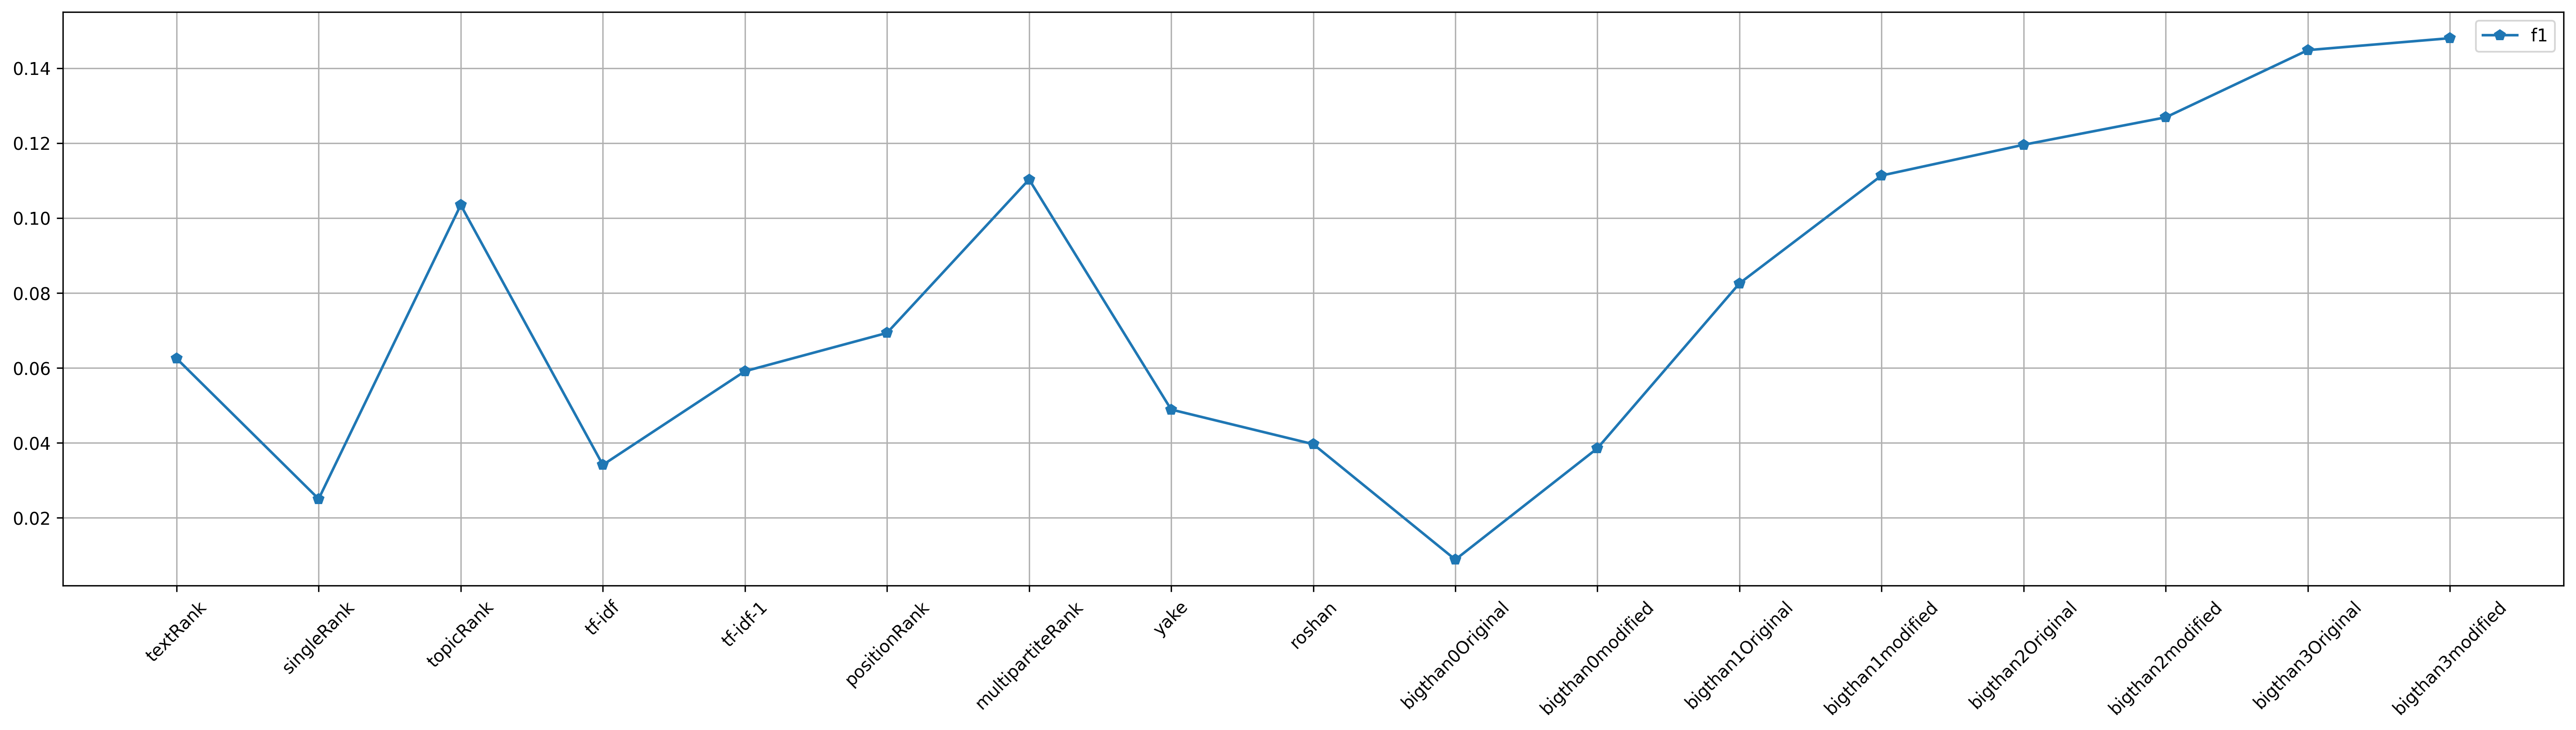

In [449]:
fig = plt.figure(dpi=300)
dft.plot(figsize=(26,6),grid=True,ax=plt.gca(),marker='p')
# plt.plot()
plt.xticks([i for i in range(dft.shape[0])],top[1:])
plt.xticks(rotation=45)
plt.savefig('./f1.png',bbox_inches='tight')

In [506]:
df2[df2.columns[-2:]]

,bigthan3Original,bigthan3modified
300,"ی,ارسطو,آکویناس,می,عقل نظری,نظری,قوه,ی,متمایز,...",",ارسطو,آکویناس,عقل نظری,نظری,فضیلت,فضایل,فضایل..."
301,",عقل شرع,شرع,اندیشه,های,بین,اسلامی,سیاسی",",عقل شرع,اندیشه"
302,"یب,غیب,خداوند,پیامبر,اثبات,پیامبر ص,ص,آیات,نفی",",خداوند,پیامبر,اثبات,آیات"
303,"اه علوم,جایگاه علوم تربیتی,علوم,علوم تربیتی,تر...",",اه علوم,جایگاه علوم تربیتی,علوم,علوم تربیتی,ن..."
304,"فه,اسلامی,اشراق,معرفتی",",اشراق,معرفتی"
...,...,...
445,"رضایت شغلی,شغلی,تعهد,تعهد سازمانی,سازمانی,عملک...",",رضایت شغلی,شغلی,تعهد,تعهد سازمانی,سازمانی,عمل..."
446,"لکرد,حقوق,کمیسیون,حقوق بشر,بشر,شورای,شورای حقو...",",لکرد,حقوق,کمیسیون,حقوق بشر,شورای,شورای حقوق,ش..."
447,"ات,تفسیر,قواعد,تفسیری,نظر,نظر گرفتن,گرفتن",",تفسیر,قواعد,تفسیری,گرفتن"
448,"حقیق,می",",حقیق"
